

### <b>Problem Statement</b>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

#### <b> Business Goal</b>
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#basic data analysis and wrangling libraries
import numpy as np
import pandas as pd
from numpy import math

#machine learning libraires and modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV

#perfomance evaluation modules
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\Deepu\\Documents\\machine_learning'

In [3]:
cd C:\\Users\\Deepu\\Downloads

C:\Users\Deepu\Downloads


In [4]:
dataset = pd.read_csv('CarPrice_project.csv')

#  lets do data inspection first 

In [5]:
dataset.shape

(205, 26)

In [6]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
dataset.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
dataset.describe(include = 'all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [11]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## let's examine the columns 

In [12]:
# car_id is something which is useless for us lets drop
dataset.drop(columns = ['car_ID'],inplace = True,axis = 1)

In [13]:
dataset.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [14]:
dataset.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [15]:
dataset.CarName.nunique()

147

### <b>DataSet Information:</b>

Car_ID: Unique id of each observation (Interger)

Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

CarName: Name of car company (Categorical)

fueltype: Car fuel type i.e gas or diesel (Categorical)

aspiration: Aspiration used in a car (Categorical)

doornumber: Number of doors in a car (Categorical)

carbody: body of car (Categorical)

drivewheel: type of drive wheel (Categorical)

enginelocation: Location of car engine (Categorical)

wheelbase: Weelbase of car (Numeric)

carlength: Length of car (Numeric)

carwidth: Width of car (Numeric)

carheight: height of car (Numeric)

curbweight: The weight of a car without occupants or baggage. (Numeric)

enginetype: Type of engine. (Categorical)

cylindernumber: cylinder placed in the car (Categorical)

enginesize: Size of car (Numeric)

fuelsystem: Fuel system of car (Categorical)

boreratio: Boreratio of car (Numeric)

stroke: Stroke or volume inside the engine (Numeric)

compressionratio: compression ratio of car (Numeric)

horsepower: Horsepower (Numeric)

peakrpm: car peak rpm (Numeric)

citympg: Mileage in city (Numeric)

highwaympg: Mileage on highway (Numeric)

price(Dependent variable): Price of car (Numeric)

Here is a takeaway 
How to spot if a column is catagorical of continous 
**The columns with the float value are generally a continous variable** 

In [16]:
dataset.describe(include = 'all')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,147,2,2,2,5,3,2,NaN,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,185,168,115,96,120,202,NaN,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [17]:
# what do we mean by duplicate datapoints
# Thats just same row values 
# it is important to remove duplicate as model will belive that there are important data points as they are reappering
dataset.duplicated().value_counts()

False    205
dtype: int64

In [18]:
print(dataset[dataset.duplicated()].shape)
len(dataset[dataset.duplicated()])

# so we don't have any duplicate values 

(0, 25)


0

# let's understand the transformation and the scaling part 

- We do transformation when we have a skewed data, it can be left skewed, right skewed so when we apply the transformation to treat the skewness of the data the machine tries to reduce the impact of extreme values and makes the distribution more symmetric while the transformation may make the data distribution look a bit like normal distribution but it's primary aim is to mitigate the impact of skewness


- We have differnet methods by which we can apply the transformation there is log tranformation, inverse transformation, square root transformation,


- Now consider this anology there is a criminal who had commit come crime now as per his cirme either you can put him behind bars for 5 years , or life time imprisonment or hang him to death there are the degrees of punishment you can give 


- Apply the same analogy as per the skewness of the data the degree of transformation varies 
- if the data is highly skewed we can go with the inverse transformation 
- if the data is mildly skewed we can go with the log tranformation generally logtransformation tackles most of the skewness 
- if the data is lightly skewed we can go with the square root transformation


- consider this case you had a data you did a log transformation and it transfomred the data into a rigth skew so you decided the increase the degree of punishment and went ahead and used inverse tarnsformation but it kind of made the data into a left skew in the case you change from right to left to so this means you should be a light treatment to the data i.e you should use the square root transformation 

so this is a hit and trail method 

## so what is MinMaxScaler and standardscaler used for
well those are used to scale down the values of the data i.e we use it to reduce the range of the data 

Both log transformation and scaling techniques like MinMaxScaler and StandardScaler serve different purposes in data preprocessing, and when to use them depends on the characteristics of your data and the requirements of your machine learning algorithm. Let's explore when to use each technique:

1. **Log Transformation**:
   - **When to Use**: Log transformation is useful when your data is highly skewed or when the scale of your data varies widely across different data points. It's particularly effective for reducing the impact of outliers and making the data more symmetric.
   - **Typical Scenarios**: Log transformation is commonly used for features that follow an exponential distribution (e.g., income, population sizes) or when dealing with positively skewed data.
   - **Benefits**: Log transformation can help stabilize variance, improve linearity, and make the data more suitable for algorithms that assume normality or require symmetric distributions.

2. **MinMaxScaler**:
   - **When to Use**: MinMaxScaler is used to scale the data within a specific range (usually between 0 and 1). It's beneficial when your algorithm requires all features to be on a similar scale and when you want to preserve the relative relationships between data points.
   - **Typical Scenarios**: MinMaxScaler is commonly used when features have different scales and ranges, and you want to ensure that each feature contributes equally to the model's learning process.
   - **Benefits**: MinMaxScaler maintains the distribution's shape and is suitable for algorithms that rely on distances or gradients, such as K-Means clustering or gradient-based optimization algorithms.

3. **StandardScaler**:
   - **When to Use**: StandardScaler standardizes features to have zero mean and unit variance. It's appropriate when you're working with algorithms that assume normally distributed data or when you want to mitigate the impact of varying scales on model performance.
   - **Typical Scenarios**: StandardScaler is often used in scenarios where the algorithm requires data to be centered at zero and have similar variances across features. It's useful for linear models like linear regression and for algorithms that involve regularization.
   - **Benefits**: StandardScaler makes the data more suitable for algorithms that assume or perform better with standardized features. It also helps to improve convergence in optimization algorithms.

In summary:

- Use **Log Transformation** when dealing with skewed data, especially if it follows an exponential distribution. This helps to make the data more symmetric and stabilize variance.
- Use **MinMaxScaler** when you need to bring features onto a similar scale while preserving the relationships between data points. This is useful for algorithms sensitive to varying scales.
- Use **StandardScaler** when you want to standardize features to have zero mean and unit variance. This is beneficial for algorithms assuming normally distributed data or when regularization is applied.

Remember that the choice of preprocessing technique should align with the requirements and assumptions of your chosen machine learning algorithm. It's often a good practice to try different preprocessing approaches and assess their impact on your model's performance through cross-validation or other evaluation methods.

 # variance inflation factor 
used to chech the multicolinearity between the features we will do this later on 

# Lets start with the eda first 

In [19]:
# let's see the distribution of price 
dataset.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

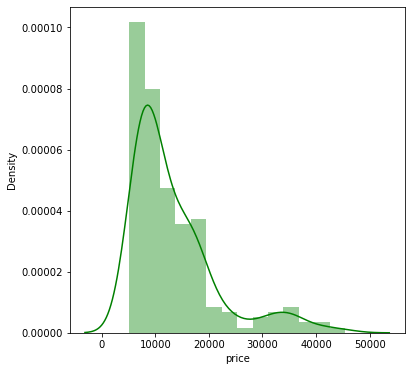

In [20]:
# lets see the distribution of the dependent variable first
plt.figure(figsize = (6,6))
sns.distplot(dataset.price, color = 'g')
plt.show()

Text(0.5, 1.0, 'Log transformation')

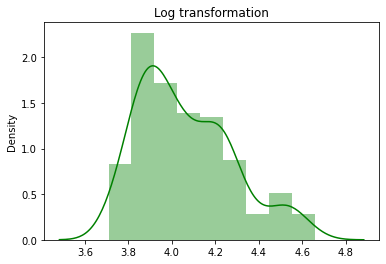

In [21]:
# the distribution is right skewed and here is where we will apply transformation
# we will try all the three transformation discussed and see which one is good 
sns.distplot(np.log10([dataset.price]),color = 'green')
plt.title('Log transformation')

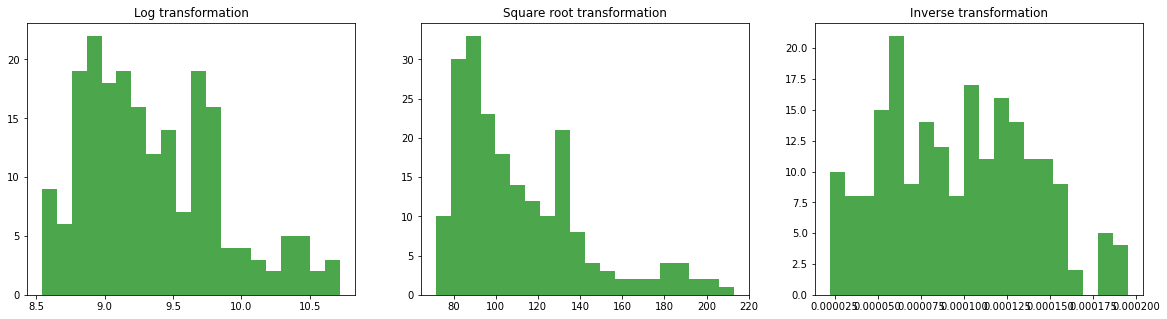

In [22]:
# lets compare the transformation 
transformation_data = [np.log(dataset.price),np.sqrt(dataset.price),1/dataset.price]
fig,axs = plt.subplots(1,3,figsize = (20,5))
flat_axis = axs.flatten()
title = ['Log transformation','Square root transformation','Inverse transformation']
for i,j in enumerate(flat_axis):
    j.hist(transformation_data[i],bins = 20, color = 'green',alpha = 0.7)
    j.set_title(title[i])

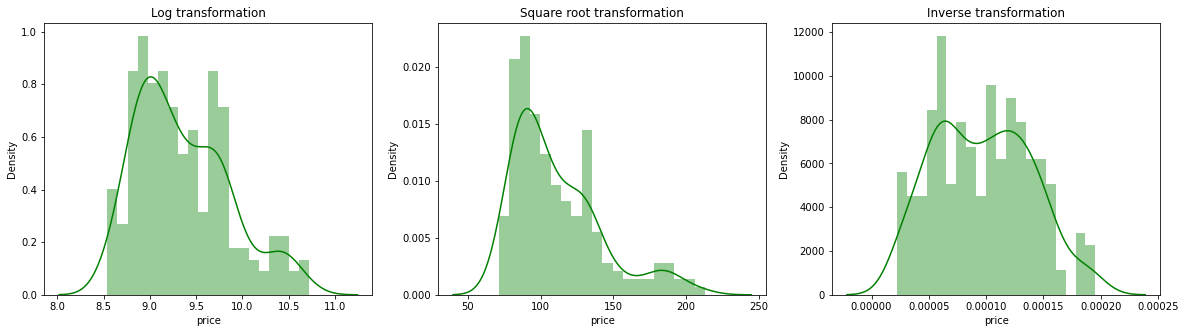

In [23]:
# same with dist plot 
transformation_data = [np.log(dataset.price),np.sqrt(dataset.price),1/dataset.price]
fig,axs = plt.subplots(1,3,figsize = (20,5))
flat_axis = axs.flatten()
title = ['Log transformation','Square root transformation','Inverse transformation']
for i,j in enumerate(flat_axis):
    sns.distplot(transformation_data[i], bins=20, kde=True, color='green', ax=flat_axis[i])
    j.set_title(title[i])

### For now we will go with the log transformation in the project


# let's examine the numerical features of the dataset

In [24]:
numeric_features=dataset.describe().columns
numeric_features

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

## let's check the histogram for the wheel base

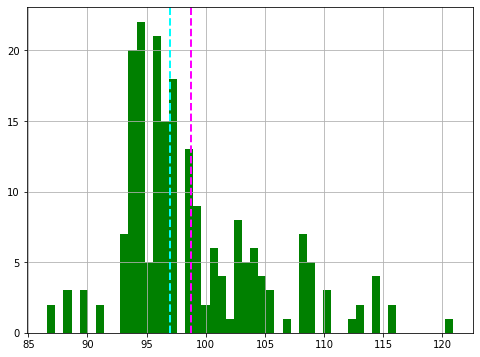

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
dataset['wheelbase'].hist(bins = 50,color = 'g')
ax.axvline(dataset['wheelbase'].mean(),color = 'magenta', linestyle = 'dashed' ,linewidth = 2)
ax.axvline(dataset['wheelbase'].median(), color = 'cyan', linestyle = 'dashed', linewidth = 2)
ax.grid(True)
plt.show()

# let's check the skwedness of the numerical features 

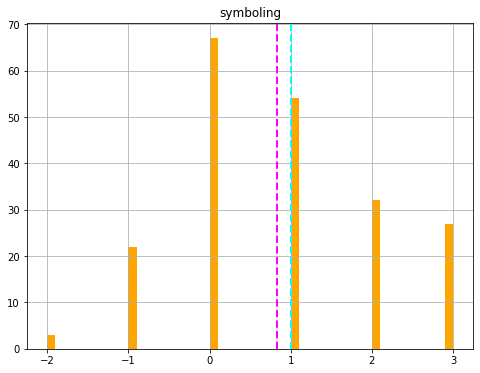

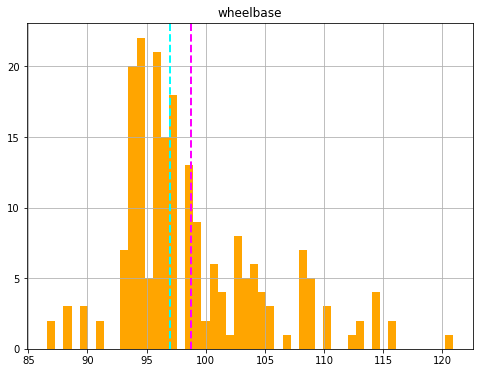

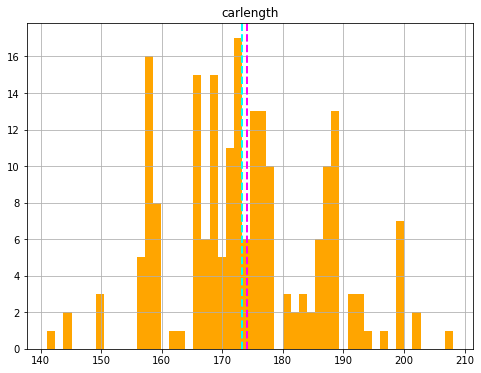

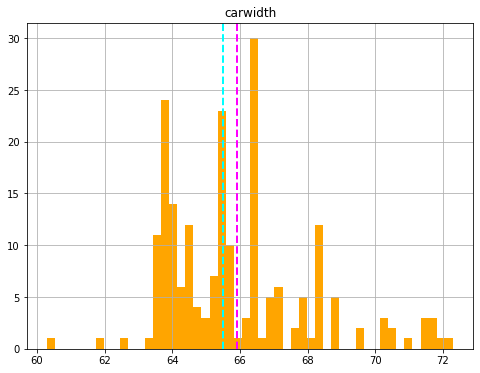

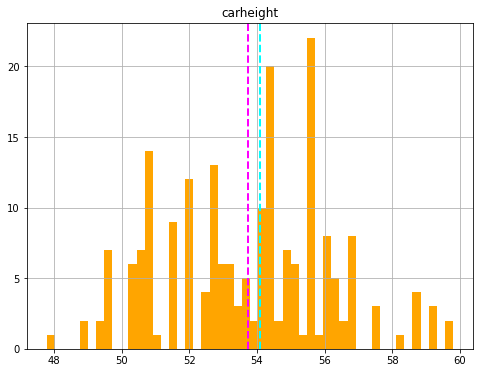

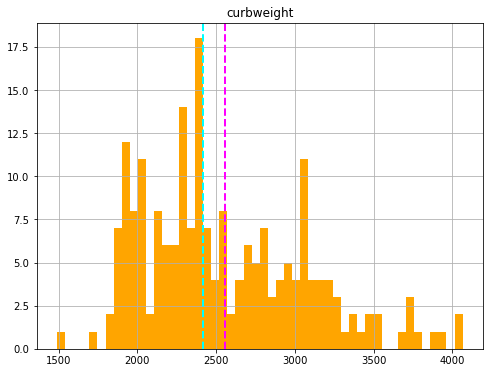

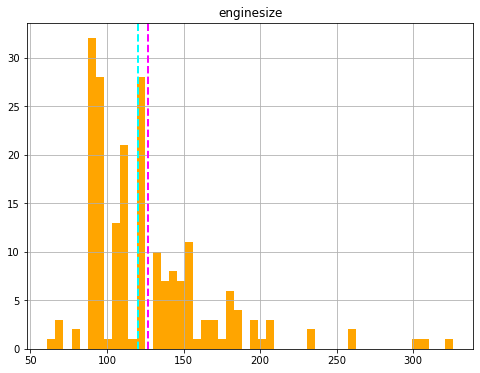

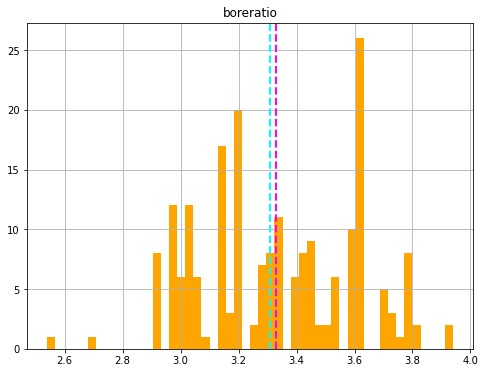

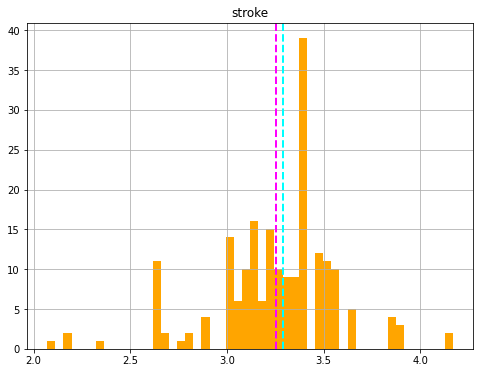

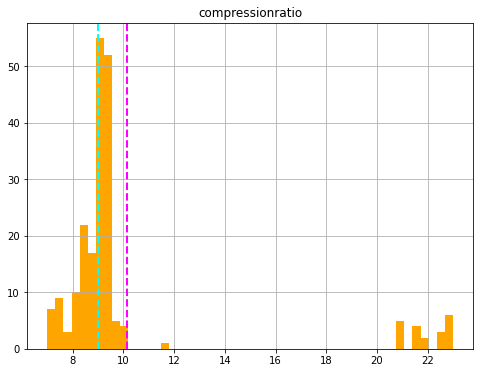

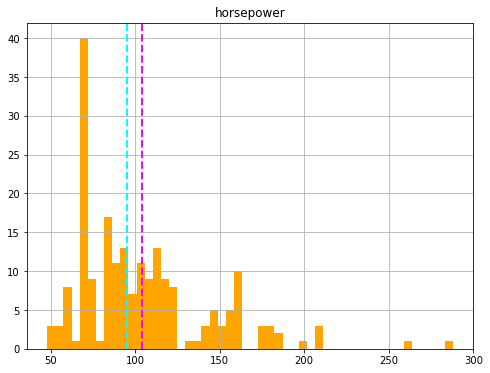

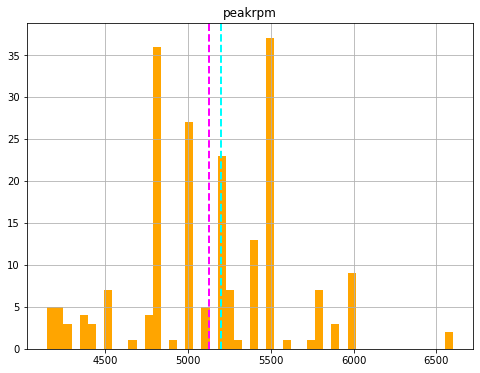

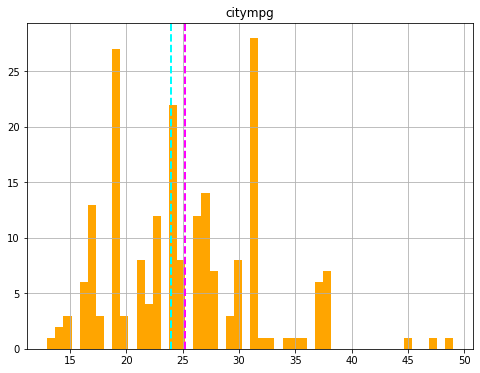

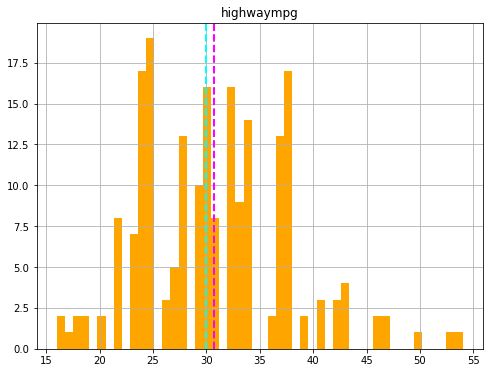

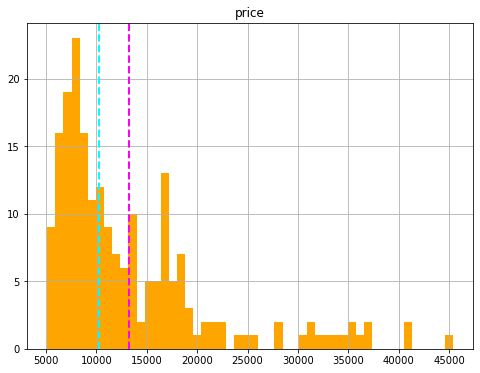

In [26]:
for feature in numeric_features:
    fig,ax = plt.subplots(figsize = (8,6))
    dataset[feature].hist(bins = 50,color = 'orange')
    ax.axvline(dataset[feature].mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
    ax.axvline(dataset[feature].median(), color = 'cyan', linestyle = 'dashed', linewidth = 2)
    ax.set_title(feature)
    

- if the median line is on the left of the mean line then  the data rigth skewed
- if the median line is on the right of the mean line then the data is left skewed

# Features transformed using log transformation

Note you can also use the subplot, like the one which you did in the bias variance trade-off assignment 

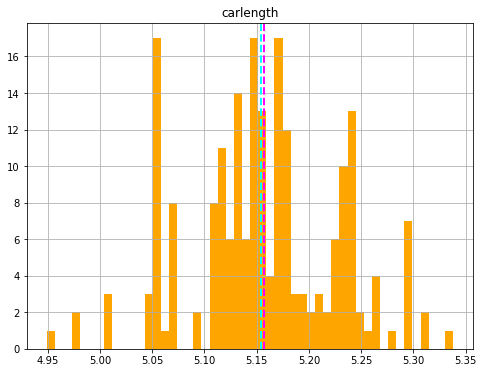

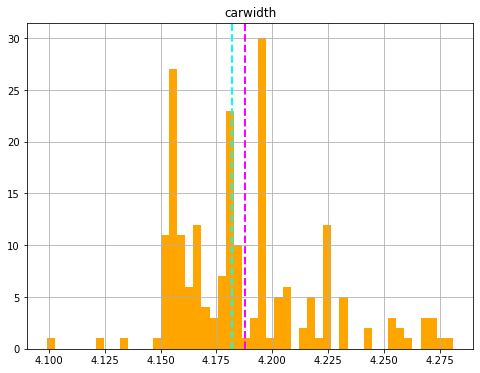

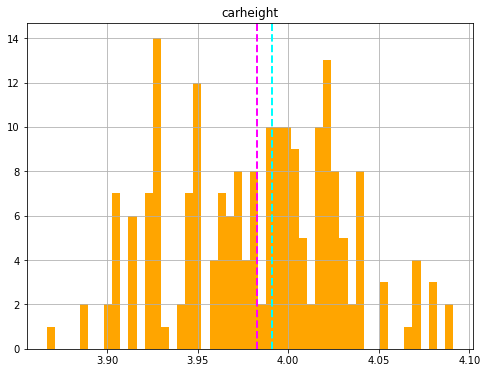

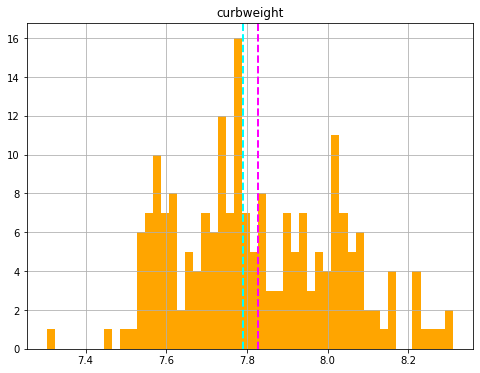

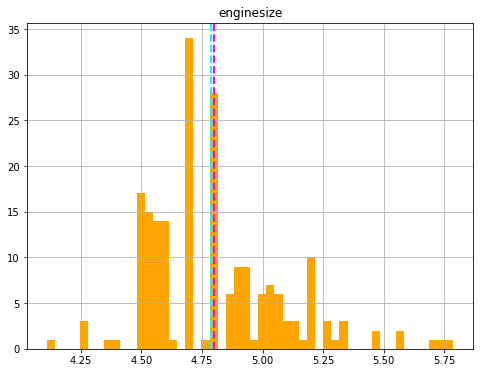

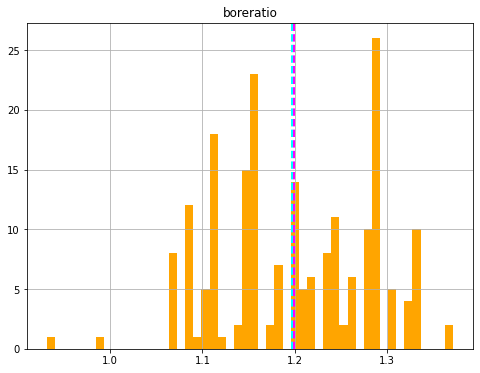

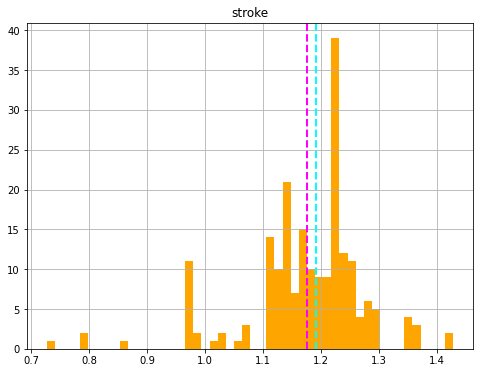

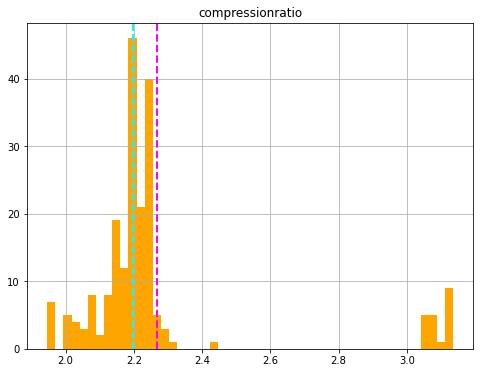

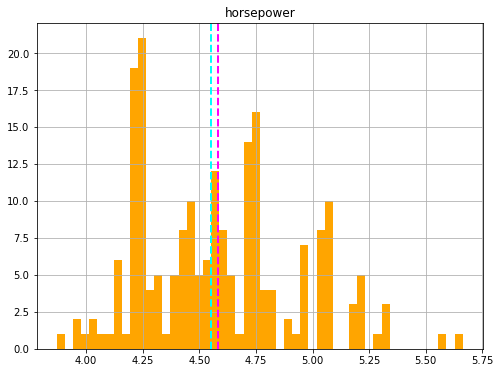

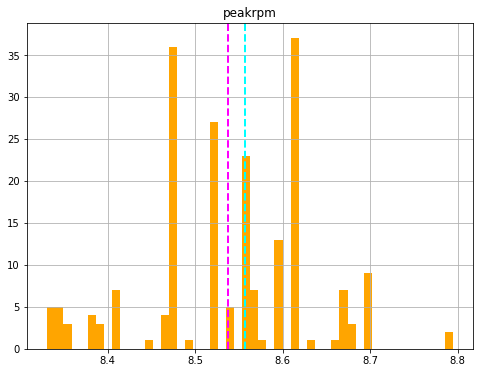

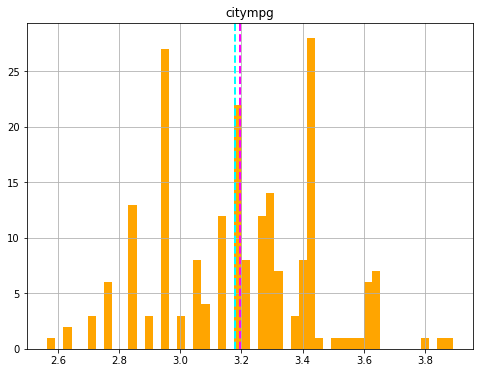

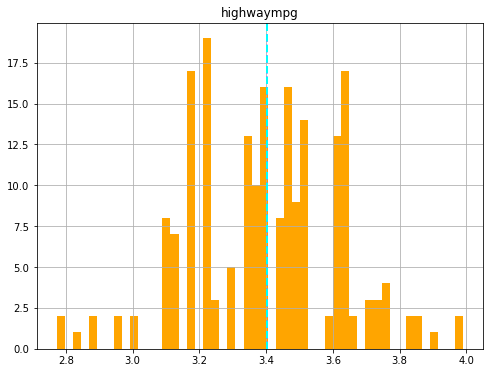

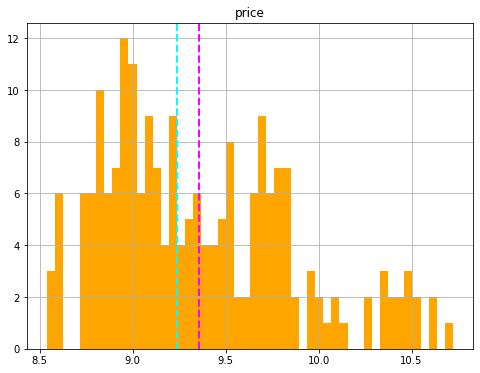

In [27]:
for feature in numeric_features[2:]:
    fig,ax = plt.subplots(figsize = (8,6))
    np.log(dataset[feature]).hist(bins = 50,color = 'orange')
    ax.axvline(np.log(dataset[feature]).mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
    ax.axvline(np.log(dataset[feature]).median(), color = 'cyan', linestyle = 'dashed', linewidth = 2)
    ax.set_title(feature)
    

In [28]:
numeric_features

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [29]:
# there was an error in the plot, symoling had empyt values 
count = 0
for i in np.log(dataset[numeric_features[0]]).isna():
    if i == True:
        count+=1
print(count)

# looping over the elements in data and keeping a count if it is True

25


# lets fit a polynomial line on the features 

In [30]:
# This is what exactly we will do 
x = [1,2,3,4,5,6,7,8,9,10]
y = [0,5,7,13,20,30,43,50,81,99]
coefficients = np.polyfit(x,y,2)

In [31]:
np.polyval(coefficients,x)

array([ 2.9       ,  3.1       ,  5.88333333, 11.25      , 19.2       ,
       29.73333333, 42.85      , 58.55      , 76.83333333, 97.7       ])

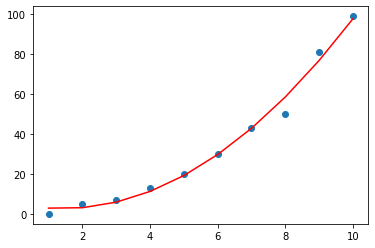

In [32]:
plt.scatter(x,y)
plt.plot(x,np.polyval(coefficients,x),color = 'red')

In [33]:
numeric_features

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [34]:
polyfit_features=list(set(numeric_features.tolist()) - {'price'})


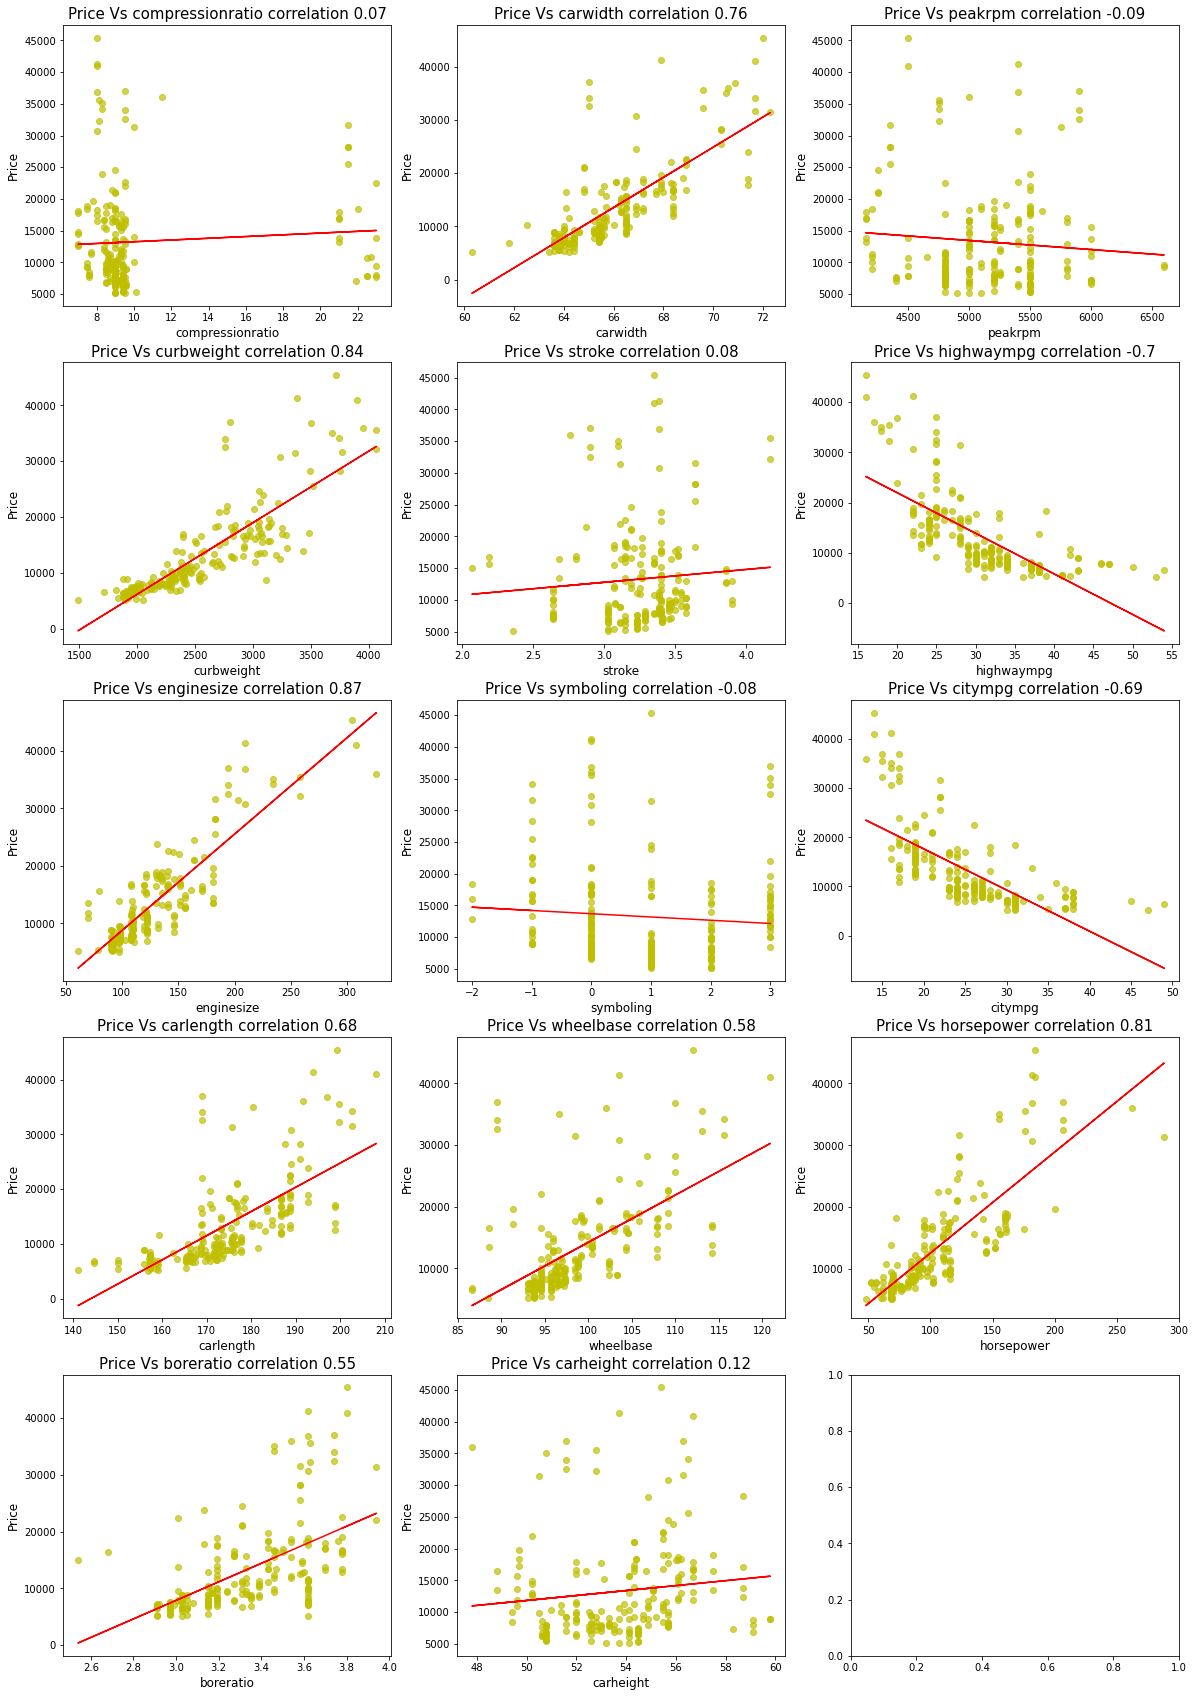

In [35]:
#create a subplot
fig, axs = plt.subplots(5,3,figsize=(20,30))

#convert it into 1d array so that you can index it easily 
flat_axis = axs.flatten()

#set counter
count = 0
for feature in polyfit_features:
    # do a scatter plot with dependent and independent variable
    flat_axis[count].scatter(dataset[feature],dataset['price'],color = 'y',alpha = 0.7)
    
    #lets add correlation also
    corr=dataset[feature].corr(dataset['price'])
    
    # fit poly line 
    coefficients = np.polyfit(dataset[feature],dataset['price'],1)
    poly_line_values = np.polyval(coefficients,dataset[feature])
    flat_axis[count].plot(dataset[feature],poly_line_values,color = 'red')
    flat_axis[count].set_title('Price Vs ' + polyfit_features[count] + ' correlation ' + str(round(corr,2)), fontsize = 15)
    flat_axis[count].set_ylabel('Price',fontsize = 12)
    flat_axis[count].set_xlabel(polyfit_features[count],fontsize = 12)
    #plt.tight_layout()
    
    count+=1

- We can conclude from the graphs that feature with high correlation have a steep line and features with least correlation has the least steepness

- High steepness suggest that there is a positive/ negative relation

In [36]:
# correlation
dataset['stroke'].corr(dataset['price'])

0.079443083881931

In [37]:
correlation = dataset.corr()

<AxesSubplot:>

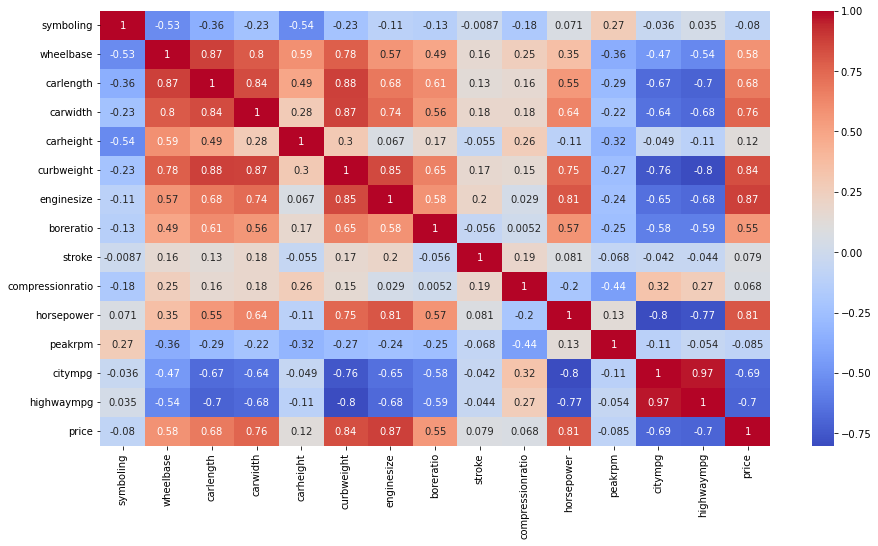

In [38]:
plt.figure(figsize = (15,8))
sns.heatmap(dataset[numeric_features].corr(),annot = True,cmap = 'coolwarm')
# even if you do a corr on the entire data it will only do the corr of numerical features 

In [39]:
# We know that city milage and highway milage is very much related we will try to remove the multicolinarity 
dataset['milage'] = 0.6*dataset['citympg'] + 0.4*dataset['highwaympg']
dataset['car_area'] = dataset['carlength']*dataset['carwidth']
dataset.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'milage',
       'car_area'],
      dtype='object')

Note that price has a high correlation with horsepower( corr = 0.81),boreration(0.55),engine size and so on look at the corr value of features with price

# Variance inflation factor
It is used to find the multicolinearity between fetaures 

Now consider this there are deepu, anil, sachin and mehra now mehra has some special skills which no one can do, Anil and Sachin also have unique skill deepu has skills which sachin has and also mehra has so if you are a manager you would layoff deepu as his contribution can be outsourced to other members of the team mathematically we would say that deepu has a very high vif which means it's contribution to the work can be done by other members.

A high VIF indicates that a predictor variable is highly correlated with other predictor variables in the model, which can lead to unstable and unreliable coefficient estimates. This doesn't necessarily mean that the variable lacks special skills or unique contributions. It means that the variable's contribution to the model can be explained by other variables in the model.

let's break down the concept of the coefficient of determination (R²) in a simpler way:

Imagine you have a bunch of people, and you're trying to figure out how their height (let's call this the "predictor variable") is influenced by their weight, age, and the number of hours they sleep (these are the "other predictor variables"). You believe that these three factors might somehow explain why some people are taller than others.

Now, let's say you gather data for a bunch of people, measure their height, weight, age, and hours of sleep, and then use this data to create a mathematical model to predict height based on weight, age, and hours of sleep.

1. **Variability in Height**: The height of people naturally varies. Some are taller, and some are shorter. This is the "variance" in height.

2. **Explained Variance**: Now, when you create your model using weight, age, and hours of sleep as predictors, the model tries to explain why some people are taller than others. It attempts to explain the natural variability in height using these predictor variables.

3. **Unexplained Variance**: However, the model might not capture all the differences in height. Some differences might not be related to weight, age, or sleep at all. These differences remain unexplained.

Now, here's where R² comes in:

- **R²**: It's like a measure that tells you how well your model explains the variance in the predictor variable (height, in this case). It's a number between 0 and 1. If R² is closer to 1, it means your model is doing a good job of explaining why some people are taller than others based on weight, age, and sleep. If R² is closer to 0, it means your model isn't explaining much and the differences in height are mostly unexplained.

So, when we say "R² measures the proportion of the variance in the predictor variable that can be explained by the other predictor variables," we mean it's a way to understand how well your model is accounting for the differences in the thing you're trying to predict (like height) using the other factors you've included in the model (like weight, age, and sleep).

Remember, a higher R² doesn't necessarily mean your model is perfect or that the included predictors are causing the observed differences. It just means your model is better at explaining the variability you've observed in your data using the predictors you've chosen.

lets say you have f1,f2,f3 and f4 feature so what is R² ith , R² i = 1 is R² value if we make a model by using f2,f3 and f4, if R² is more here this means the VIF will be small and this means that the proporation of variance in the target value is well explained by the f1 feature but if R² is low this means VIF is high and the propration of variance in the target value is not explained properly by the f1 feature or  It means that the variable's contribution to the model can be explained by other variables in the model.

VIF: The VIF measures how much the variance of the estimated coefficient for a predictor variable increases when that variable is included in a regression model along with other predictor variables. It's a measure of the extent to which multicollinearity is inflating the uncertainty of the coefficient estimates.

R²: The coefficient of determination (R²) is a measure that explains the proportion of the variance in the dependent variable that is explained by the predictor variables in a regression model.

Certainly! Let's break down what it means for the Variance Inflation Factor (VIF) formula to involve calculating R² for each predictor when regressed on other predictors:

Imagine you have a dataset with several predictor variables (features) like "Age," "Income," and "Education," and you want to build a model to predict "Salary." When calculating VIF for a particular predictor, let's say "Income," you're interested in understanding how much "Income" can be explained by the other predictor variables, like "Age" and "Education."

Here's a step-by-step explanation:

1. **Pick a Predictor:** Let's focus on the predictor variable "Income." We want to know how much the variability in "Income" can be explained by the other predictors.

2. **Regressed on Others:** To find out, we create a regression model where "Income" is the response variable and "Age" and "Education" are the predictor variables. In other words, we're trying to predict "Income" using "Age" and "Education."

3. **Calculate R²:** When we fit this regression model, we get a coefficient of determination, also known as R². R² tells us how well "Age" and "Education" together can explain the variability in "Income." If R² is high, it means that "Age" and "Education" can predict "Income" quite well. If R² is low, it means that "Age" and "Education" don't do a good job of explaining the variability in "Income."

4. **VIF Calculation:** The VIF for "Income" is calculated using the formula VIF = 1 / (1 - R²). This formula takes the R² value from the regression of "Income" on "Age" and "Education" and calculates the corresponding VIF for "Income."

5. **Interpretation:** A high VIF value for "Income" means that "Income" is highly correlated with "Age" and "Education." This indicates multicollinearity, where "Income" is influenced by "Age" and "Education," making it harder to isolate their individual effects.

So, when we say "calculating R² for each predictor when regressed on other predictors," we mean that we're measuring how much each predictor's variability can be explained by the other predictors in the model. The resulting R² values are then used to compute the VIF values, which indicate the extent to which multicollinearity is inflating the uncertainty of the coefficient estimates in a regression model.

# hyperparameter and parameter 
the coefficients of features are called parameter we don't have direct control to parameters but by using hyperparameter like alpha in gradient descent and lambda in regularized equation we can control parameter

So L1 is bascially reduces the no. of features(feature selection) so if we have poor L1 r2 score , So if you want to increase the varialbe you should not use L1
So if your model is mugging too much, then is when you use L1 because you model is learning from futile features as well 

#
In cross validation we split the train dataset into k folds and then uphold one part and train on the rest and this goes on

SO CV is done on 80% of the data i.e train data 

In [40]:
# lets do the VIF of the columns in dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(dataset[numeric_features].values,0)

2.5433826410138693

In [41]:
# let's do this on the entire dataset
for i in range(len(numeric_features)):
    print(variance_inflation_factor(dataset[numeric_features],i))

2.5433826410138693
2296.81085843926
1919.9619932392807
2832.341654537179
929.4787008724428
408.7557946030151
93.01497661735107
296.76215350195474
139.76745186529757
17.277978371111274
67.61524833565589
227.3848028180588
445.9796023241382
513.7632680726362
24.106848640404447


In [42]:
# lets create a data frame of this
# doing a list comprehension and ziping the list comprehension with numeric_features
display(pd.DataFrame(zip(numeric_features,[variance_inflation_factor(dataset[numeric_features],i) for i in range(len(numeric_features))]),columns = ['Variable','V.I.F'],))

,Variable,V.I.F
0,symboling,2.543383
1,wheelbase,2296.810858
2,carlength,1919.961993
3,carwidth,2832.341655
4,carheight,929.478701
5,curbweight,408.755795
6,enginesize,93.014977
7,boreratio,296.762154
8,stroke,139.767452
9,compressionratio,17.277978


In [43]:
 numeric_features

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [44]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [45]:
for i in dataset.describe().columns:
    if i not in ['price']:
        print(i)

symboling
wheelbase
carlength
carwidth
carheight
curbweight
enginesize
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
milage
car_area


In [46]:
def vif_df(X):
    df = pd.DataFrame()
    df['Variables'] = X.columns
    df['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    return df

In [47]:
vif_df(dataset[[i for i in dataset.describe().columns if i not in ['price']]])

,Variables,VIF
0,symboling,2.646796
1,wheelbase,2316.959780
2,carlength,6136.028870
3,carwidth,3170.397591
4,carheight,1108.503341
5,curbweight,415.172460
6,enginesize,68.941339
7,boreratio,326.471548
8,stroke,132.074737
9,compressionratio,16.465709


In [48]:
def vif_df(X):
    """ this will create a df of vif and the input it takes is a df"""
    #creating a empty df
    df = pd.DataFrame()
    # creating variable columns and naming it as the columns in the input data frame
    df['Variables'] = X.columns
    
    #creating vif column with the hlep of list of values 
    df['V.I.F'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    
    return df

In [49]:
a = [[1,2,3,4],[1,2,3,4]]
b = np.array(a)

In [50]:
print(a)
print('')
print(b)

[[1, 2, 3, 4], [1, 2, 3, 4]]

[[1 2 3 4]
 [1 2 3 4]]


In [51]:
x = pd.DataFrame(b)

In [52]:
x

,0,1,2,3
0,1,2,3,4
1,1,2,3,4


In [53]:
x['deepu'] = [9,8]

In [54]:
x

,0,1,2,3,deepu
0,1,2,3,4,9
1,1,2,3,4,8


This is what we are doing in the funciton vif_df when we are creating a list of vif and naming it as VIF columns 

In [55]:
# we will pass a dataframe of this 
dataset.describe().columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'milage',
       'car_area'],
      dtype='object')

In [56]:
dataset[dataset.describe().columns].head(3)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,milage,car_area
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,23.4,10820.08
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,23.4,10820.08
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,21.8,11213.60


In [57]:
[i for i in (dataset.describe().columns) if i not in ['price']]

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'milage',
 'car_area']

In [58]:
# this is what we will pass in the vif_df function and get the vif
dataset[[i for i in (dataset.describe().columns) if i not in ['price']]]

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,milage,car_area
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,23.4,10820.08
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,23.4,10820.08
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,21.8,11213.60
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,26.4,11690.92
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,19.6,11726.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,25.0,13008.32
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,21.4,12989.44
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,20.0,13008.32
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,26.4,13008.32


In [59]:
vif_df(dataset[[i for i in dataset.describe().columns if i not in ['price']]])

,Variables,V.I.F
0,symboling,2.646796
1,wheelbase,2316.959780
2,carlength,6136.028870
3,carwidth,3170.397591
4,carheight,1108.503341
5,curbweight,415.172460
6,enginesize,68.941339
7,boreratio,326.471548
8,stroke,132.074737
9,compressionratio,16.465709


### The benifit of writing the code in such way is you can easily remove the features with high VIF 
now how are we eliminating the features , we are seeing the vif score and then watcing if it has a low correlation with the target variable then we are removing the feature

In [60]:
vif_df(dataset[[i for i in dataset.describe().columns if i not in ['price','carlength','wheelbase','carwidth','carheight','boreratio','curbweight','stroke','peakrpm','horsepower','car_area','symboling','citympg','highwaympg']]])

,Variables,V.I.F
0,enginesize,5.170320
1,compressionratio,9.119143
2,milage,8.201171


In [61]:
# let's update the numerical_features
numerical_features = ['enginesize','compressionratio','milage']

# lets see the categorical variable now 
The CarName column has name of the brand and the model we are just interested in the brand, we will just pick the brand also there is an spelling mistake we will pass a dictory and replace the misspelt brand name and do a title() to get the first letter in caps

In [62]:
dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [63]:
dataset['CarName'].str.split(" ",expand = True)[0]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: 0, Length: 205, dtype: object

In [64]:
dataset['company'] = dataset['CarName'].str.split(' ', expand = True)[0]
dataset['company']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: company, Length: 205, dtype: object

In [65]:
dataset['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [66]:
dataset['company']=dataset['company'].replace({'toyouta':'Toyota','vm':'Volkswagen','maxda':'Mazda','porcshce':'Porsche'})
dataset['company']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: company, Length: 205, dtype: object

In [67]:
dataset['company']=dataset['company'].str.title()

In [68]:
dataset['company'].value_counts().sum()

205

In [69]:
dataset['company']=dataset['CarName'].str.split(' ', expand = True)[0].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen','maxda':'Mazda','porcshce':'Porsche'}).str.title()

In [70]:
dataset['company'].value_counts().sort_index()

Alfa-Romero     3
Audi            7
Bmw             8
Buick           8
Chevrolet       3
Dodge           9
Honda          13
Isuzu           4
Jaguar          3
Mazda          17
Mercury         1
Mitsubishi     13
Nissan         18
Peugeot        11
Plymouth        7
Porsche         5
Renault         2
Saab            6
Subaru         12
Toyota         32
Volkswagen     12
Volvo          11
Name: company, dtype: int64

In [71]:
# this will return all the features which are object or category 
dataset.describe(include = ['object','category'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,company
count,205,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8,22
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Toyota
freq,6,185,168,115,96,120,202,148,159,94,32


In [72]:
# lets make a bar chart for the categorical features 
dataset.describe(include = ['object','category']).columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'company'],
      dtype='object')

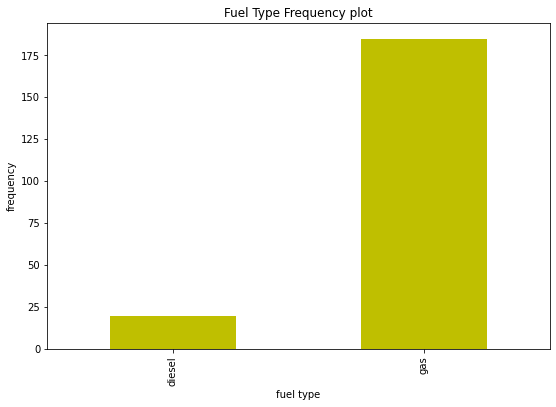

In [73]:
plt.figure(figsize = (9,6))
ax = plt.gca()
dataset['fueltype'].value_counts().sort_index().plot.bar(ax = ax, color = 'y')
ax.set_title('Fuel Type Frequency plot')
ax.set_xlabel('fuel type')
ax.set_ylabel('frequency')
plt.show()

In [74]:
# The problem with this is you can't set the labels 

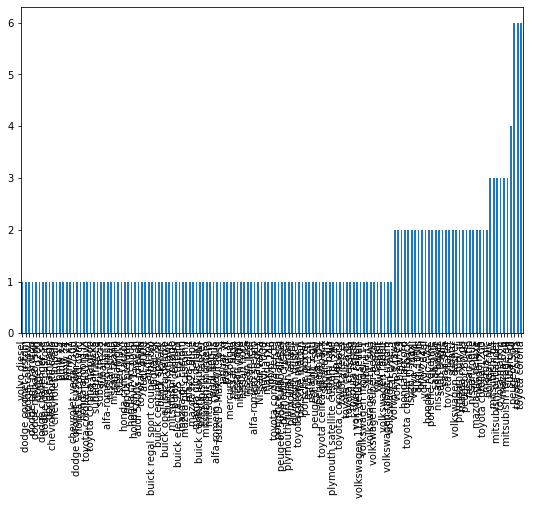

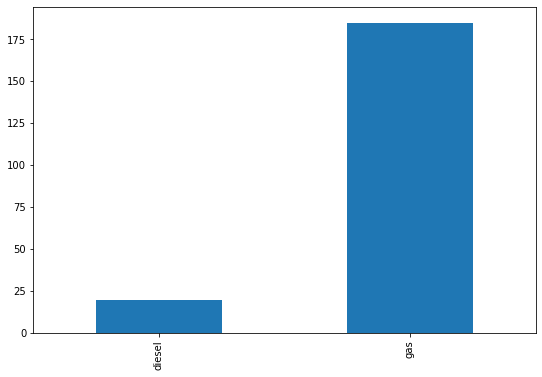

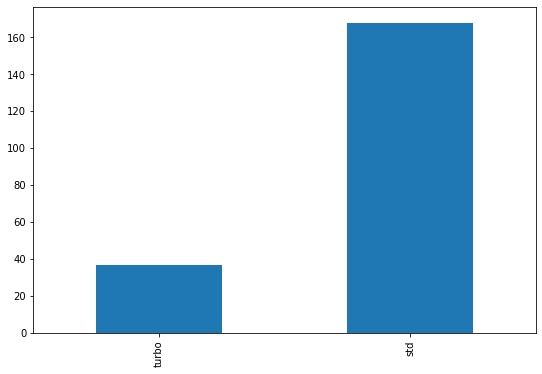

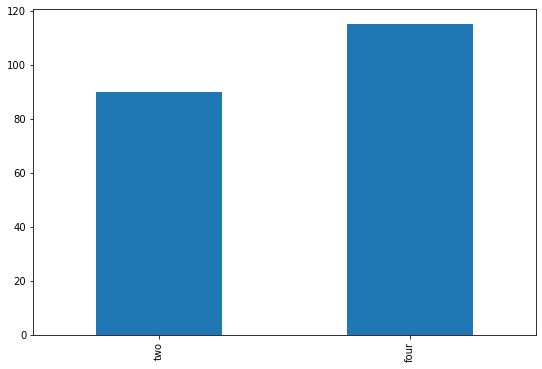

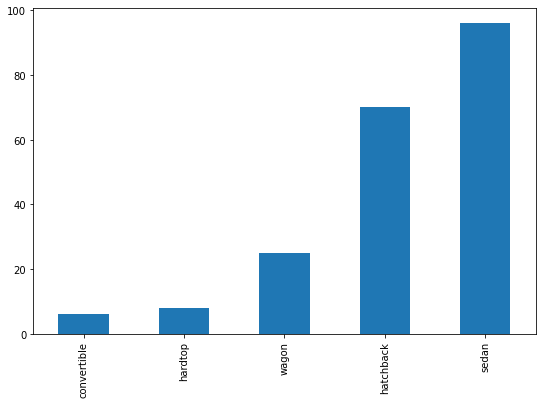

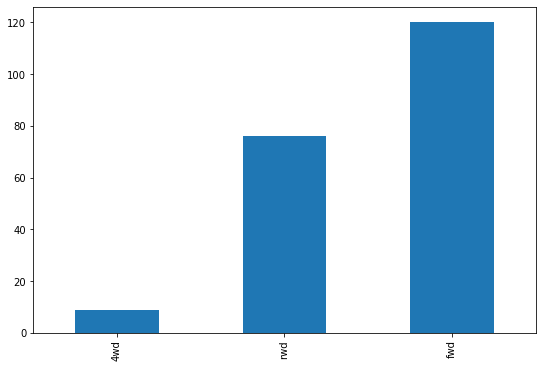

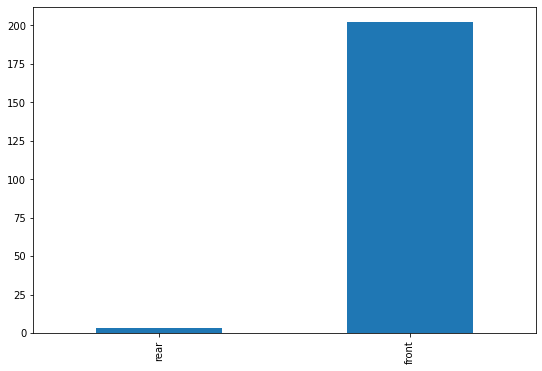

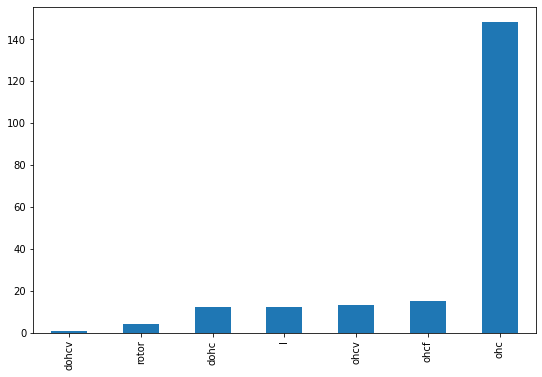

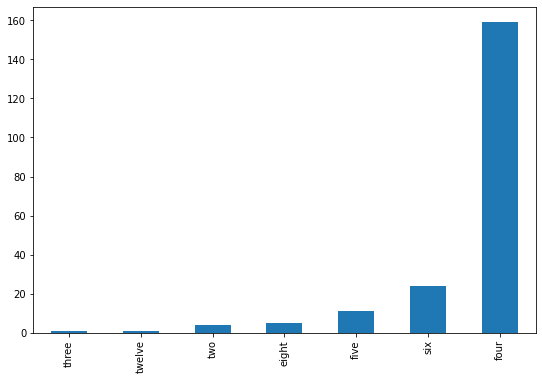

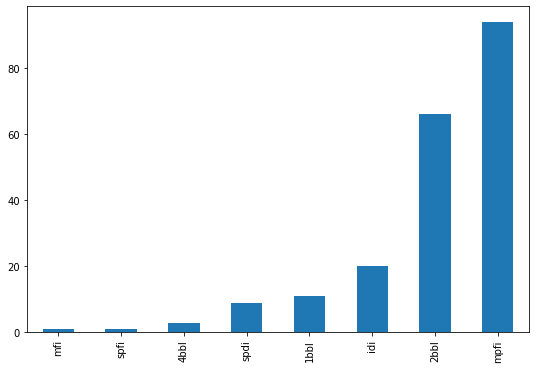

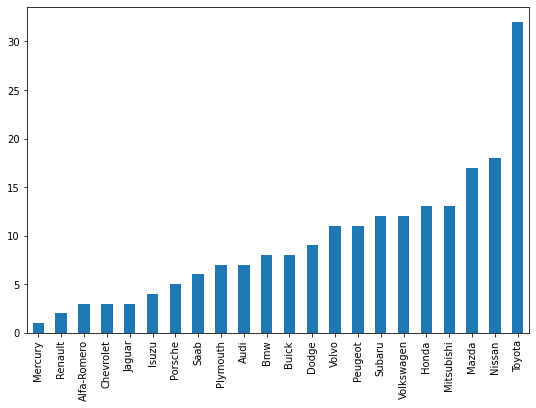

In [75]:
for i in dataset.describe(include = ['object','category']).columns:
    plt.figure(figsize = (9,6))
    dataset[i].value_counts().sort_values().plot.bar()
    plt.show()

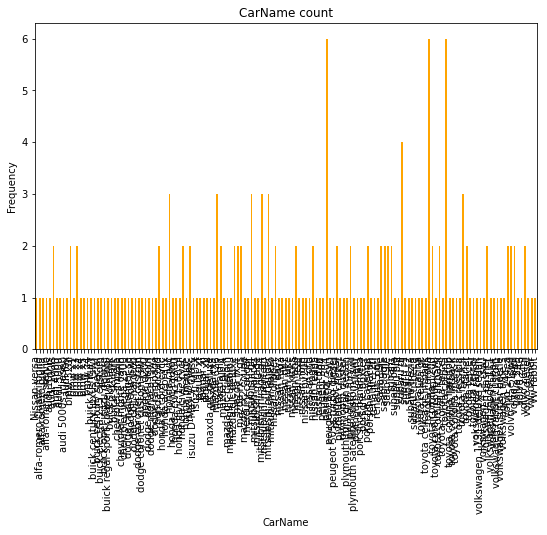

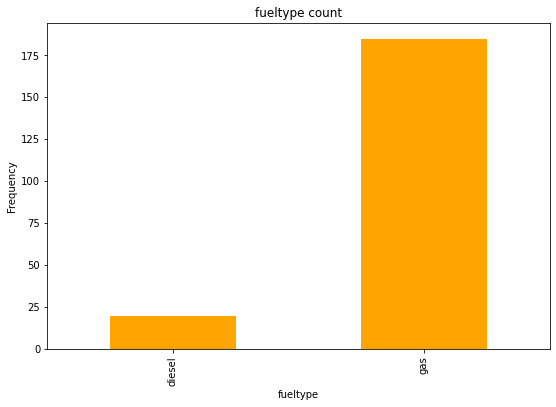

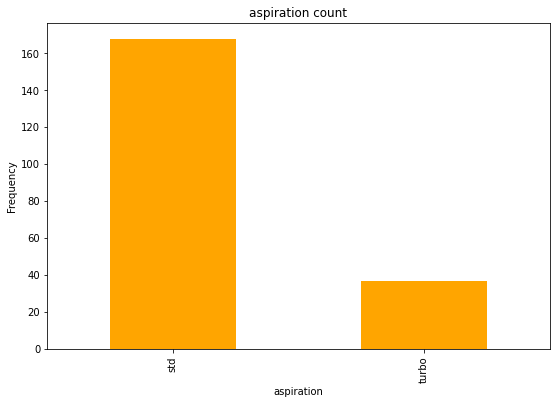

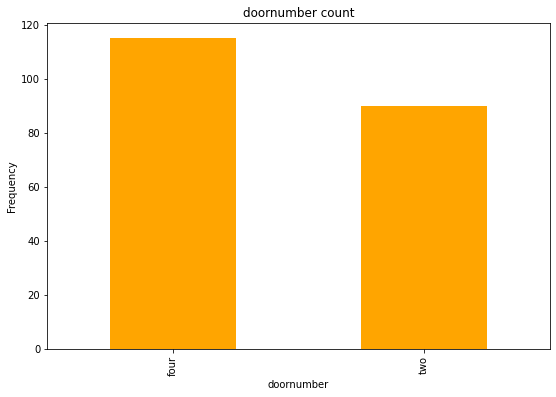

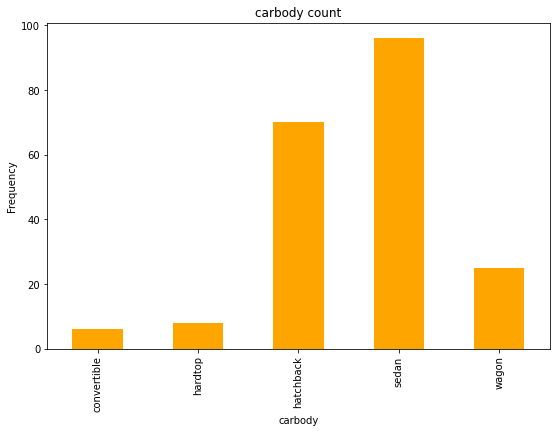

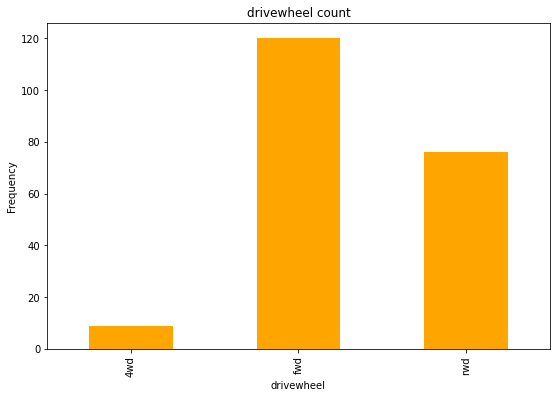

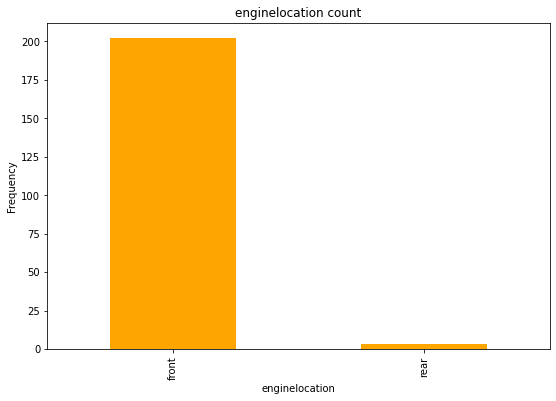

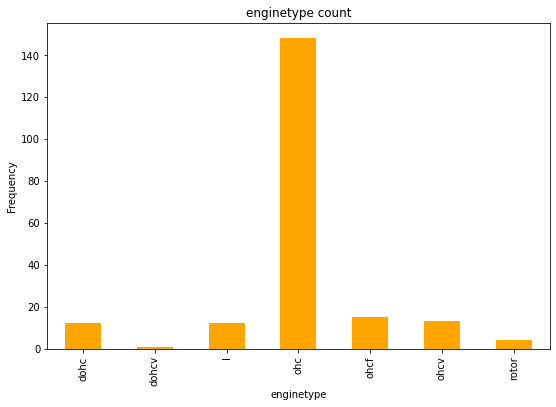

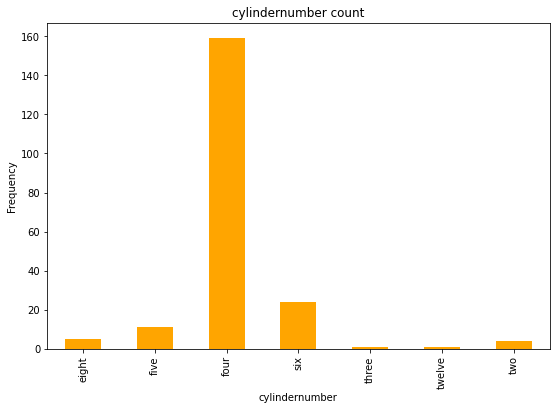

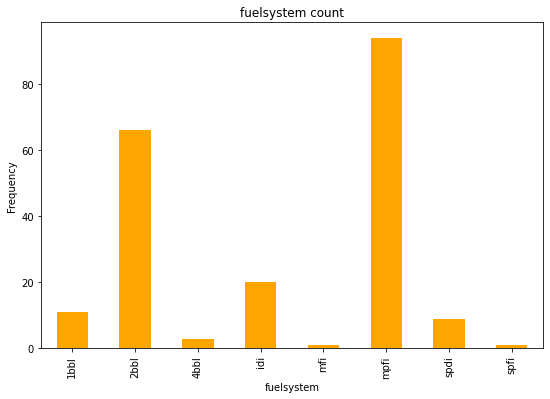

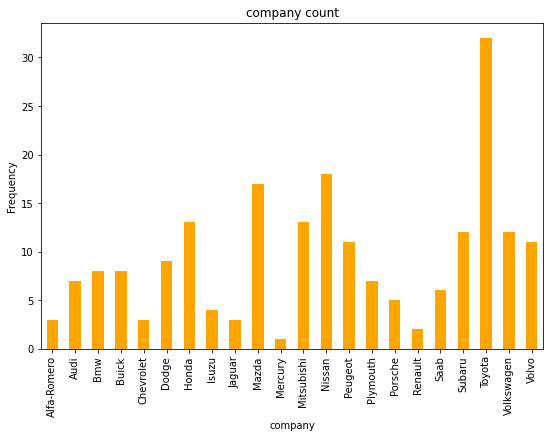

In [76]:
for col in dataset.describe(include = ['object', 'category']).columns:
    plt.figure(figsize = (9,6))
    ax = plt.gca() # this make us easy to call the axes i.e the plot and set x,y,title lables
    feature=dataset[col].value_counts().sort_index()
    feature.plot.bar(ax = ax, color = 'orange')
    ax.set_title(col + ' count')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

## Let's us see the price distribution of Fueltype i.e what is the price distribtuion of cars which are diesel powered and cars which are gas powered

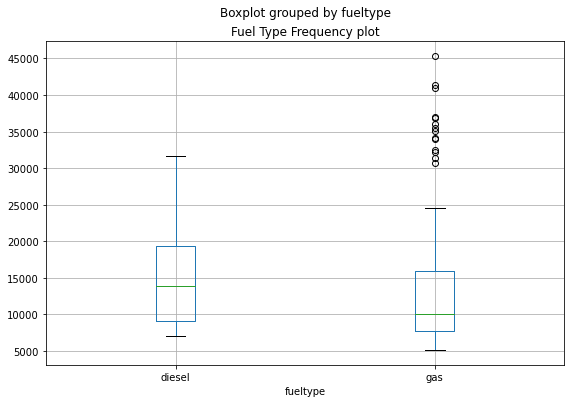

In [77]:
# let's do a boxplot and see the distribution 
plt.figure(figsize = (9,6))
ax = plt.gca()
dataset.boxplot(column = 'price',by = 'fueltype', ax = ax)
ax.set_title('Fuel Type Frequency plot')
#ax.set_xlabel('fuel type')
#ax.set_ylabel('frequency')
plt.show()

By looking at the data we can say that expensive cars are gas cars 

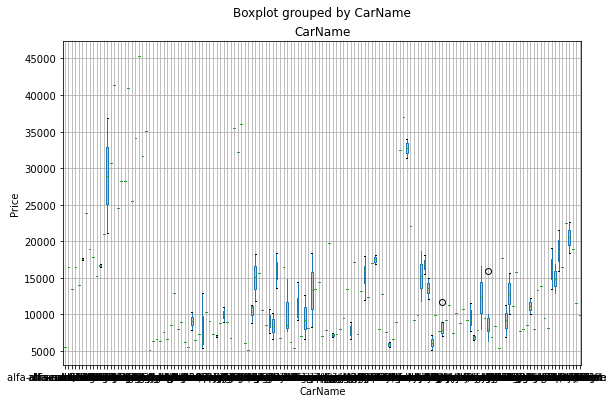

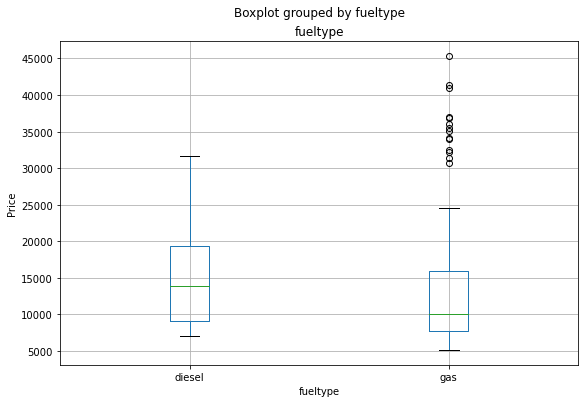

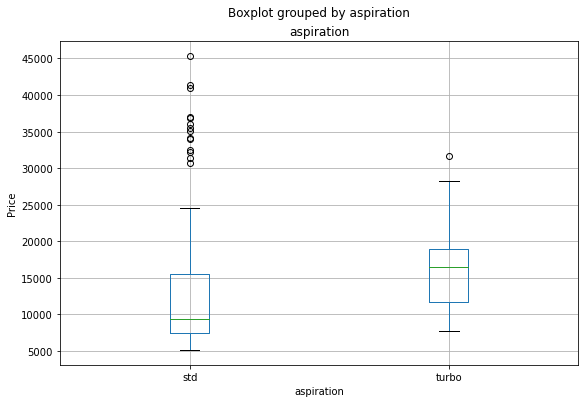

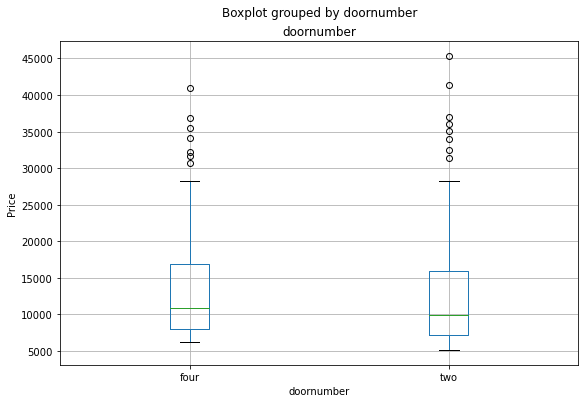

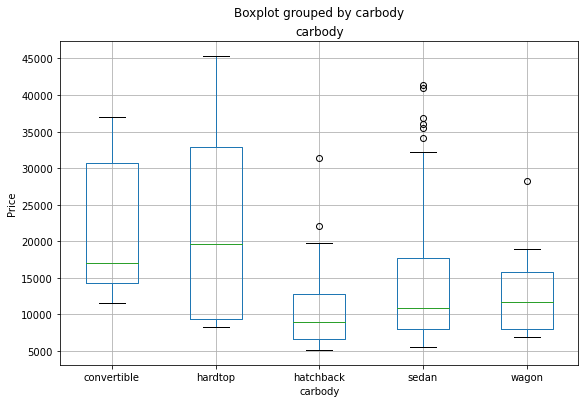

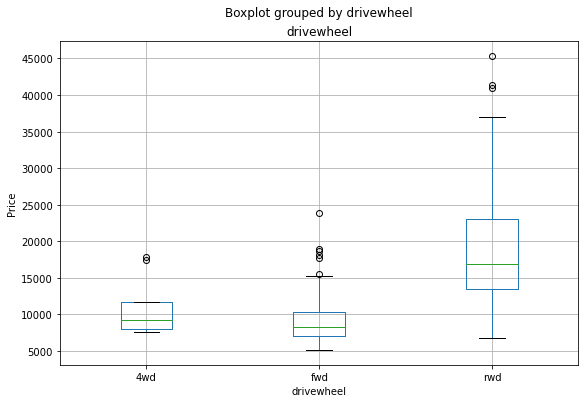

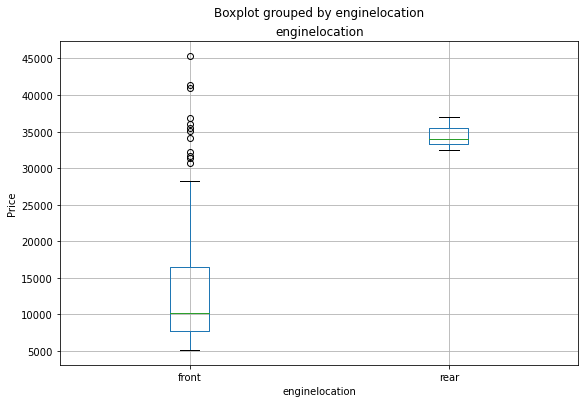

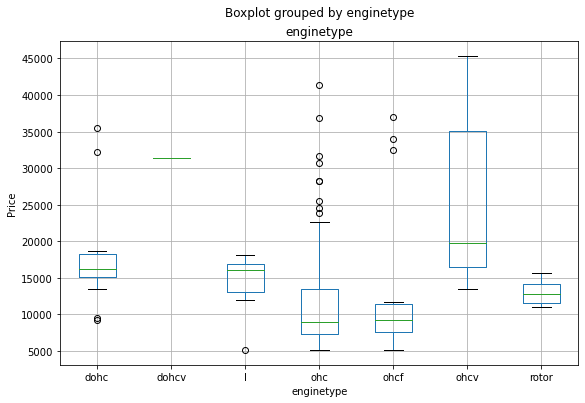

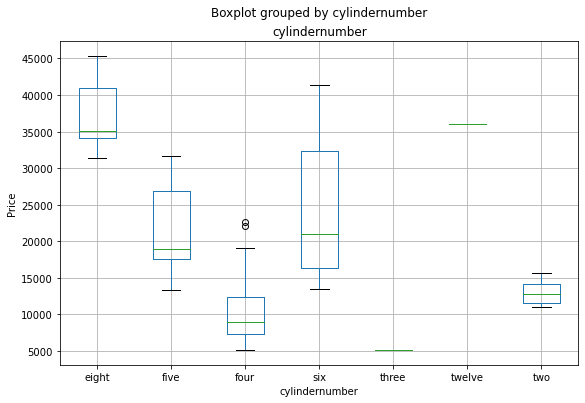

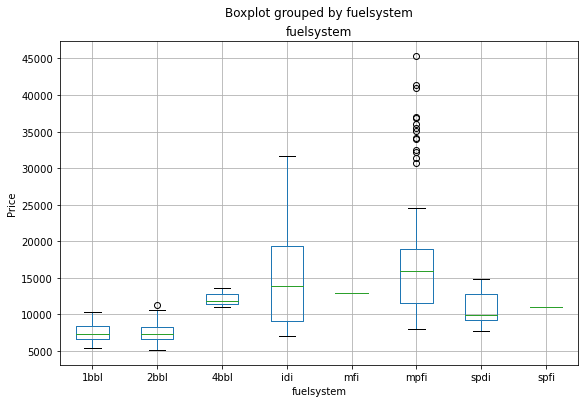

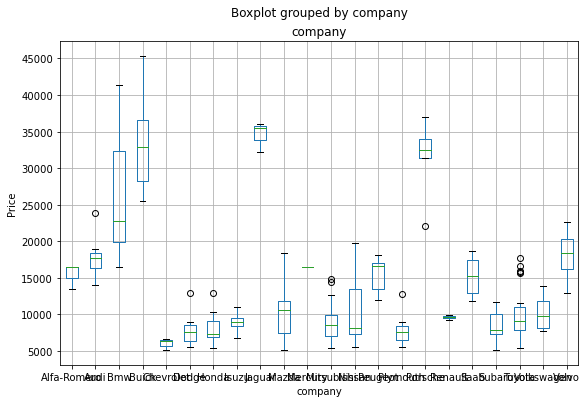

In [78]:
#Lets do a boxplot of categorical features with the price for all categorical features

for col in dataset.describe(include = ['object','category']).columns:
    plt.figure(figsize = (9,6))
    ax = plt.gca()
    dataset.boxplot(column = 'price', by = col,ax = ax)
    ax.set_title(col)
    ax.set_ylabel('Price')
plt.show()

In [79]:
dataset['company'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Renault         2
Mercury         1
Name: company, dtype: int64

## let's check the average car price of every company 

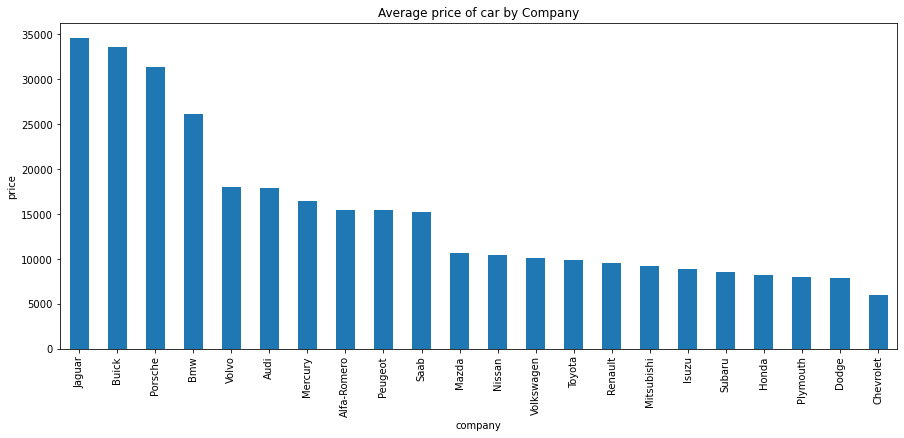

In [80]:
plt.figure(figsize = (15,6))
ax = plt.gca()
dataset.groupby('company')['price'].mean().sort_values(ascending = False).plot.bar(ax = ax)
ax.set_ylabel('price')
ax.set_title('Average price of car by Company')

plt.show()

# This is how you use gca first name the plot(axes) and call the plot and set lables

In [81]:
df_autox=pd.DataFrame(dataset.groupby('company')['price'].mean())

In [82]:
df_autox.rename(columns = {'price':'price_mean'},inplace = True)
df_autox

,price_mean
company,
Alfa-Romero,15498.333333
Audi,17859.166714
Bmw,26118.750000
Buick,33647.000000
Chevrolet,6007.000000
Dodge,7875.444444
Honda,8184.692308
Isuzu,8916.500000
Jaguar,34600.000000


In [83]:
array = [['a','b','a','b','b','c','c','a','a','c'],[1,2,3,4,5,6,7,8,9]]

In [84]:
df = pd.DataFrame({'name':['a','b','a','b','b','c','c','a','a','c'],'price':[1,2,3,4,5,6,7,8,9,10]})

In [85]:
df

,name,price
0,a,1
1,b,2
2,a,3
3,b,4
4,b,5
5,c,6
6,c,7
7,a,8
8,a,9
9,c,10


In [86]:
df_j=pd.DataFrame(df.groupby('name')['price'].mean())

In [87]:
df_j

,price
name,
a,5.250000
b,3.666667
c,7.666667


In [88]:
pd.merge(df,df_j,how = 'left',left_on = 'name',right_on = 'name')
# this will pick all the values in the left table and join with all the values present in the

,name,price_x,price_y
0,a,1,5.250000
1,b,2,3.666667
2,a,3,5.250000
3,b,4,3.666667
4,b,5,3.666667
5,c,6,7.666667
6,c,7,7.666667
7,a,8,5.250000
8,a,9,5.250000
9,c,10,7.666667


takes all the values of the left table and maps the left table values with right table values but only those values which are present on the left table only  

In [89]:
# lets do the same on the our dataset as well

In [90]:
df_autox

,price_mean
company,
Alfa-Romero,15498.333333
Audi,17859.166714
Bmw,26118.750000
Buick,33647.000000
Chevrolet,6007.000000
Dodge,7875.444444
Honda,8184.692308
Isuzu,8916.500000
Jaguar,34600.000000


In [91]:
pd.merge(dataset,df_autox, how= 'left', left_on = 'company',right_on = 'company').head() 

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,milage,car_area,company,price_mean
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,13495.0,23.4,10820.08,Alfa-Romero,15498.333333
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,16500.0,23.4,10820.08,Alfa-Romero,15498.333333
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,9.0,154,5000,19,26,16500.0,21.8,11213.60,Alfa-Romero,15498.333333
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,10.0,102,5500,24,30,13950.0,26.4,11690.92,Audi,17859.166714
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,8.0,115,5500,18,22,17450.0,19.6,11726.24,Audi,17859.166714


In [92]:
# let's update the change on dataset 
dataset = pd.merge(dataset,df_autox,how = 'left',left_on = 'company',right_on = 'company')

In [93]:
dataset.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'milage',
       'car_area', 'company', 'price_mean'],
      dtype='object')

In [94]:
dataset['price_mean']

0      15498.333333
1      15498.333333
2      15498.333333
3      17859.166714
4      17859.166714
           ...     
200    18063.181818
201    18063.181818
202    18063.181818
203    18063.181818
204    18063.181818
Name: price_mean, Length: 205, dtype: float64

In [95]:
# the other way to solve the proble # note when you use the lambda in .apply the .apply acts as iterator
def func(x):
    if x < 12000:
        result = 0
    elif 12000 <= x < 24000:
        result = 1
    else:
        result = 2
    return result

In [96]:
dataset.apply(lambda x: func(x.price_mean),axis = 1).value_counts()

0    142
1     39
2     24
dtype: int64

In [97]:
dataset.price.mean()

13276.710570731706

In [98]:
dataset['company_cat']=dataset['price_mean'].apply(lambda x: 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))

In [99]:
dataset.price.apply(lambda x: 0 if x < 12000 else (1 if 12000 < x < 24000 else 2))

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    1
204    1
Name: price, Length: 205, dtype: int64

In [100]:
dataset['company_cat'].value_counts()

0    142
1     39
2     24
Name: company_cat, dtype: int64

In [101]:
dataset.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

 - don't do code like you did below

In [102]:
# So when you are writing a function on dataframe you don't have to use the loop the apply function takes care of that 

def fun1(x):
    for i in x:
        if i < 12000: # the code breaks here and goes to esle and returns the result hence this will always return good 
            result = 'good'
        else:
            result = 'bad'
        return result

In [103]:
dataset.apply(fun1,axis =1).value_counts()

good    205
dtype: int64

In [104]:
dataset['company_cat']

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    1
204    1
Name: company_cat, Length: 205, dtype: int64

In [105]:
correlation.price

symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [106]:
correlation.price

symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [107]:
dataset[[i for i in dataset.columns if i not in ['price_mean','company_cat']]].corr().price

symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
milage             -0.695484
car_area            0.738052
Name: price, dtype: float64

In [108]:
dataset.describe().columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'milage',
       'car_area', 'price_mean', 'company_cat'],
      dtype='object')

In [109]:
dataset.describe(include = ['object','category']).columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'company'],
      dtype='object')

In [110]:
dataset['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

So we will have to use lable encoding to convert the categorical features into numeric features 

There is two way you can do this 
way 1

In [111]:
np.where(dataset['fueltype'] == 'gas',0,1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0])

In [112]:
dataset.describe(include = ['object','category'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,company
count,205,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8,22
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Toyota
freq,6,185,168,115,96,120,202,148,159,94,32


In [113]:
# for this featurs we will use one hot encoding 
dataset.fuelsystem.value_counts(),dataset.enginetype.value_counts(),dataset.carbody.value_counts()

(mpfi    94
 2bbl    66
 idi     20
 1bbl    11
 spdi     9
 4bbl     3
 mfi      1
 spfi     1
 Name: fuelsystem, dtype: int64,
 ohc      148
 ohcf      15
 ohcv      13
 dohc      12
 l         12
 rotor      4
 dohcv      1
 Name: enginetype, dtype: int64,
 sedan          96
 hatchback      70
 wagon          25
 hardtop         8
 convertible     6
 Name: carbody, dtype: int64)

In [114]:
dataset.describe(include = ['object', 'category'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,company
count,205,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8,22
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Toyota
freq,6,185,168,115,96,120,202,148,159,94,32


In [115]:
# using lambda function and uing mulitple else funciton 

dataset['cylindernumber'].apply(lambda x: 2 if x == 'two' else (3 if x == 'three' else (4 if x == 'four' else \
( 5 if x == 5 else (6 if x == 'six' else (8 if x == 'eight' else (12 if x == 'twelve' else 0))))))).value_counts()

4     159
6      24
0      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

In [116]:
dataset['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [117]:
# creating a copy of the data 
dataset_pr=dataset.copy()

In [118]:
# Lets stick to the basics here and do the label encoding 

encoder_nums = {'fueltype':{'diesel':1,'gas':0},
                'aspiration':{'turbo':1,'std':0},
                'doornumber':{'four':4, 'two':2},
                'drivewheel':{'fwd':0,'4wd':0,'rwd':1},
                'cylindernumber':{'four':4,'six':6,'five':5,'eight':8,
                                   'two':2,'twelve':12,'three':3}
               }
dataset_pr.replace(encoder_nums,inplace = True)

While doing label encoding you can choose unique values but doing so will crate a distibution and range issue so you will have to take care of that hence lets stick to the basics for now

In [119]:
# you can do label encoding mannualy by creating featuers and usng np.where to populate the features or you can use builtin 
# we will go with the builtins
dataset_pr=pd.get_dummies(dataset_pr, columns = ['carbody','enginetype','fuelsystem'],prefix = ['body','etype','fsystem'])

In [120]:
dataset_pr.head()

,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,3,alfa-romero giulia,0,0,2,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romero stelvio,0,0,2,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romero Quadrifoglio,0,0,2,1,front,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,audi 100 ls,0,0,4,0,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,audi 100ls,0,0,4,0,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [121]:
dataset_pr.describe(include = ['object','category'])

,CarName,enginelocation,company
count,205,205,205
unique,147,2,22
top,toyota corona,front,Toyota
freq,6,202,32


In [122]:
# these are the features which we will be consider for our predication of price 
features = numerical_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl'
       , 'fsystem_idi', 'fsystem_mpfi',
       'fsystem_spdi'])

In [123]:
dataset_pr.describe().columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'drivewheel',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'milage', 'car_area', 'price_mean', 'company_cat',
       'body_convertible', 'body_hardtop', 'body_hatchback', 'body_sedan',
       'body_wagon', 'etype_dohc', 'etype_dohcv', 'etype_l', 'etype_ohc',
       'etype_ohcf', 'etype_ohcv', 'etype_rotor', 'fsystem_1bbl',
       'fsystem_2bbl', 'fsystem_4bbl', 'fsystem_idi', 'fsystem_mfi',
       'fsystem_mpfi', 'fsystem_spdi', 'fsystem_spfi'],
      dtype='object')

In [124]:
len(features)

24

So we are consdier only 24 features 

In [125]:
features

['enginesize',
 'compressionratio',
 'milage',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_cat',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_dohc',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'fsystem_1bbl',
 'fsystem_2bbl',
 'fsystem_idi',
 'fsystem_mpfi',
 'fsystem_spdi']

# Feature transformation

We will apply zscore  


The Z-score transformation, also known as standardization or normalization, is a data preprocessing technique used to rescale a feature's values so that they have a mean of 0 and a standard deviation of 1. This transformation is often applied to features to make them comparable and suitable for various machine learning algorithms and statistical analyses. 

In [150]:
from scipy.stats import zscore
X = dataset_pr[features].apply(zscore)

In [151]:
y = np.log10(dataset_pr['price'])

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [153]:
print(X_train.shape)
print(X_test.shape)

(164, 24)
(41, 24)


# linear model 

In [154]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [155]:
reg.score(X_train,y_train)

0.9324420504983304

In [156]:
reg.coef_

array([ 0.07683825,  0.01590146, -0.05608906,  0.00149697,  0.02135358,
        0.01543893,  0.01238109,  0.00031735,  0.06565892,  0.01437322,
        0.0005336 , -0.00028112,  0.00042538, -0.00796079, -0.04125975,
       -0.05110849, -0.0658886 , -0.03672994, -0.04472375, -0.00052948,
       -0.01768536,  0.00149697,  0.01790728, -0.00753211])

In [157]:
len(reg.coef_)

24

In [158]:
# beta not values 
reg.intercept_

4.059743198935876

In [159]:
y_pred_test = reg.predict(X_test)

In [160]:
y_pred_test

array([3.81967552, 4.13714622, 4.17646819, 3.56301623, 4.00910128,
       4.0881102 , 3.78244388, 3.86958683, 4.15481411, 3.87647818,
       4.3307769 , 4.57347531, 4.11445435, 4.05412396, 3.80023554,
       4.08476194, 4.03989491, 4.18239791, 3.92761811, 3.85263527,
       3.97322164, 4.13566249, 4.03251989, 4.08476194, 4.14866948,
       3.84357219, 3.87365512, 4.11048216, 3.89255312, 3.8372148 ,
       3.96211116, 3.98838418, 4.32026565, 4.00589168, 3.86832486,
       4.45577252, 4.07673423, 4.17242568, 3.81943108, 4.62804648,
       3.76912549])

In [188]:
mse = mean_squared_error(10**(y_test),10**(y_pred_test))
rmse = np.sqrt(mse)
print(f'MSE:{mse} \n\nRMSE:{rmse}')
# this means if the prediction I say is 40000 there is an error of 2996 dollars which is quite decent for car price prediction

MSE:8981848.585185645 

RMSE:2996.9732373155493


In [189]:
# let's calculate the r2_score for test only 
r2=r2_score(10**(y_test),10**(y_pred_test))
print(f'The r2 score for the test data is {r2}')

The r2 score for the test data is 0.8839799650687874


In [177]:
def adjusted_r2(n,k,r):
    adj_r2 = 1 - (((n-1)/(n-k-1)) * (1-r))
    return adj_r2

In [182]:
adjusted_r2(len(y_test),len(features),r2)

0.7099499126719685

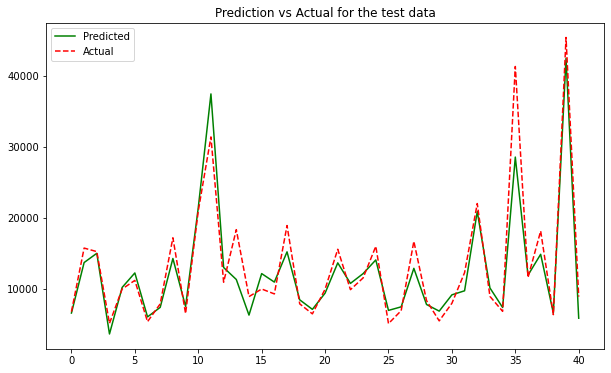

In [207]:
plt.figure(figsize = (10,6))
ax  = plt.gca()
plt.plot(10**(y_pred_test),color = 'green')
plt.plot(np.array(10**y_test),color = 'red',linestyle = '--')
ax.set_title('Prediction vs Actual for the test data')
ax.legend(['Predicted','Actual'])
plt.show()


In [221]:
y_train_pred=reg.predict(X_train)

In [222]:
y_train

4      4.241795
71     4.533823
134    4.177248
145    4.051500
122    3.881328
         ...   
67     4.407425
192    4.141293
117    4.258877
47     4.508530
172    4.247212
Name: price, Length: 164, dtype: float64

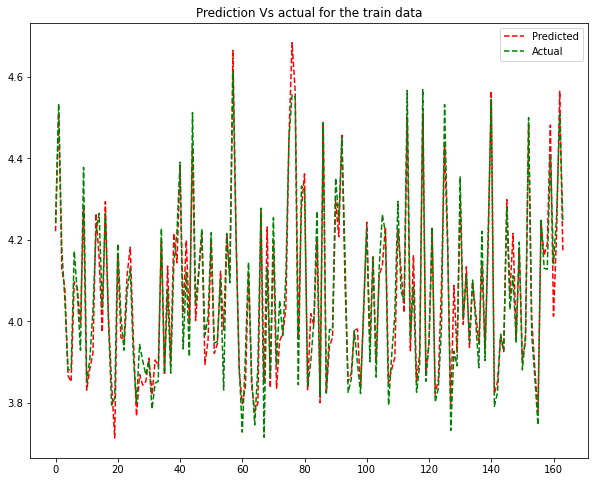

In [460]:
# let's see the learning during training 
plt.figure(figsize = (10,8))
plt.plot((y_train_pred),color = 'red',linestyle = '--')
plt.plot(np.array(y_train),color = 'green', linestyle = '--')
plt.legend(['Predicted','Actual'])
plt.title('Prediction Vs actual for the train data', fontsize = 12)
plt.show()

In [247]:
# lets run a lasso an ridge regression 

# Ridge model
fit intrecept is True means please include the beta not i.e the y intercept value also in the penalty term also 

In [248]:
ridge = Ridge(alpha = 1, fit_intercept = True)
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [249]:
ridge.coef_

array([ 7.25558685e-02,  1.33211697e-02, -5.85304780e-02,  1.90926449e-03,
        1.98164539e-02,  1.51703253e-02,  1.39774391e-02,  1.45139113e-04,
        6.56570964e-02,  1.39625899e-02,  6.27423199e-04, -7.13485781e-05,
        4.72037088e-04, -8.17992608e-03, -3.21750836e-02, -4.26667283e-02,
       -4.93442295e-02, -2.67329125e-02, -3.41773749e-02, -2.86243079e-03,
       -2.27614916e-02,  1.90926449e-03,  1.22891996e-02, -9.40205326e-03])

In [250]:
ridge.intercept_

4.059496773808835

In [256]:
# lets find the trian error i.e rmse and mse

In [258]:
#train 
ridge_y_pred_train=ridge.predict(X_train)

In [259]:
r2_score(10**y_train,10**ridge_y_pred_train)

0.9306908365261958

In [261]:
ridge_y_pred_test=ridge.predict(X_test)

In [264]:
#test
r2_score(10**y_test,10**ridge_y_pred_test)

0.8925272117074214

lets run the ridge for 5 different values and check out the r2_score for every one 

In [266]:
r2_list = []
alphas = [0.01, 0.1, 1, 5, 8]
for i in alphas:
    ridge = Ridge(alpha = i,fit_intercept = True)
    ridge.fit(X_train,y_train)
    y_pred_test = ridge.predict(X_test)
    r2 = r2_score(10**y_test,10**y_pred_test)
    r2_list.append(r2)

In [267]:
r2_list

[0.8841577651947015,
 0.8856235717031827,
 0.8925272117074214,
 0.8905039330011486,
 0.8864381693814699]

# So the r2 score if max for the alpha = 1

# let's do a lasso and feature selection 

In [271]:
lasso = Lasso(alpha = 0.01,fit_intercept = True)
lasso.fit(X_train,y_train)
lasso.coef_

array([ 0.0582348 ,  0.0088723 , -0.06036996,  0.        ,  0.00437474,
        0.        ,  0.00929213,  0.        ,  0.07527333,  0.00126243,
        0.        , -0.00016799,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.00031239,
       -0.02685808,  0.        ,  0.00136257, -0.        ])

In [272]:
lasso_y_pred_test= lasso.predict(X_test)

In [275]:
r2_score(10**lasso_y_pred_test,10**y_test)

0.8330122176136179

In [298]:
#lasso fails miserably 
#let's run for different alpha 
r2_lasso = []
lasso_weights = [] # for feature selection 
alhpas = [0.01,0.1,1,5,8]
for alpha in alphas:
    lasso = Lasso(alpha = alpha , fit_intercept = True)
    lasso.fit(X_train,y_train)
    lasso_weights.append(lasso.coef_)
    r2_lasso.append(r2_score(10**lasso.predict(X_test),10**y_test))
print(f' The r2 score of different aphas are {r2_lasso}')  
print(' ')
print(f'parameters {lasso_weights}')

 The r2 score of different aphas are [0.8330122176136179, -4.419841953679637, 0.0, 0.0, 0.0]
 
parameters [array([ 0.0582348 ,  0.0088723 , -0.06036996,  0.        ,  0.00437474,
        0.        ,  0.00929213,  0.        ,  0.07527333,  0.00126243,
        0.        , -0.00016799,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.00031239,
       -0.02685808,  0.        ,  0.00136257, -0.        ]), array([ 0.03185407,  0.        , -0.01846926,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.04736191,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ]), array([ 0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
       -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0.]), array([ 0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [299]:
lasso_weights

[array([ 0.0582348 ,  0.0088723 , -0.06036996,  0.        ,  0.00437474,
         0.        ,  0.00929213,  0.        ,  0.07527333,  0.00126243,
         0.        , -0.00016799,  0.        , -0.        ,  0.        ,
        -0.        , -0.        ,  0.        ,  0.        , -0.00031239,
        -0.02685808,  0.        ,  0.00136257, -0.        ]),
 array([ 0.03185407,  0.        , -0.01846926,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.04736191,  0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ,
         0.        , -0.        ,  0.        ,  0.        , -0.        ,
        -0.        ,  0.        ,  0.        , -0.        ]),
 array([ 0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
        -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0.]),
 array([ 0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
        -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0.]),
 array([ 0.,  0.

In [300]:
lasso_weights_array=np.array(lasso_weights)

In [306]:
lasso_weights_array.shape

(5, 24)

Text(0.5, 0, 'alpha')

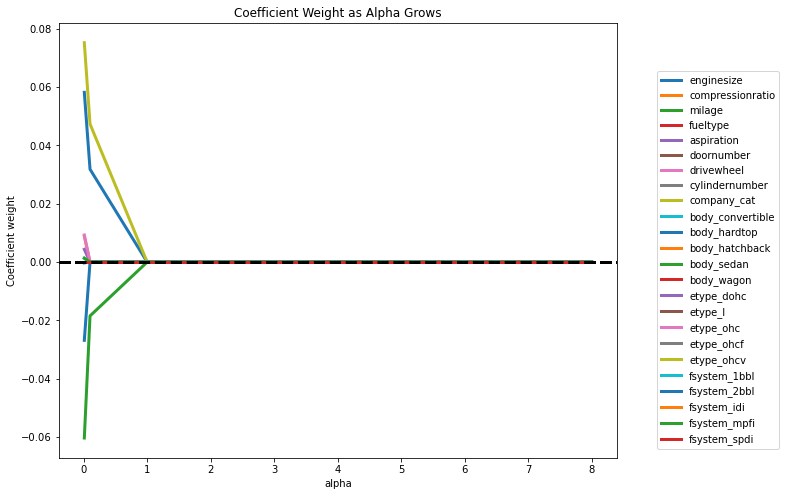

In [323]:
plt.figure(figsize = (10,8))
for i in range(lasso_weights_array.shape[1]):
    plt.plot(alphas,lasso_weights_array[:,i],label = features[i],linewidth = 3)
    plt.axhline(0,color = 'black', linestyle = '--',linewidth = 3)
    
# manually specify the coordinate of the legend
plt.legend(bbox_to_anchor = (1.3,0.9)) # this arument basically puts the legned out of the plotbox 
plt.title('Coefficient Weight as Alpha Grows')
plt.ylabel('Coefficient weight')
plt.xlabel('alpha')   
    


### features with non zero coefficents/ parameters are the important features at aplha = 1

# let's fit a polynomial regression also 

Certainly, let's elaborate on point 4, which involves creating a polynomial regression model using scikit-learn's `PolynomialFeatures` and `LinearRegression` within a pipeline. This is a common approach for fitting polynomial regression models in scikit-learn. simple it's the feature*feature to make the degree of equation as 2 and if you want a cube it would do multiply the features so that the power of the loss function become 3

1. **PolynomialFeatures**:
   
   `PolynomialFeatures` is a preprocessing technique provided by scikit-learn that allows you to generate polynomial features from your original dataset. It takes an integer parameter `degree`, which specifies the degree of polynomial features to be generated. For example, if you set `degree=2`, it will create new features that are the squares of the original features, as well as cross-products of original features. It essentially expands your feature space to capture polynomial relationships.

   Example:
   ```python
   from sklearn.preprocessing import PolynomialFeatures

   degree = 2  # Degree of the polynomial
   poly = PolynomialFeatures(degree)
   X_poly = poly.fit_transform(X)
   ```

   Here, `X_poly` will contain the original features and their polynomial combinations up to the specified degree.

2. **LinearRegression**:

   `LinearRegression` is a linear regression model provided by scikit-learn. It fits a linear model to the data, including the polynomial features generated by `PolynomialFeatures`. It takes no additional parameters in the basic form.

   Example:
   ```python
   from sklearn.linear_model import LinearRegression

   model = LinearRegression()
   ```

3. **Pipeline**:

   A pipeline in scikit-learn is a way to streamline a sequence of data processing steps into a single object. In this case, we create a pipeline that consists of two steps: polynomial feature generation (`PolynomialFeatures`) and linear regression modeling (`LinearRegression`). The pipeline ensures that the feature transformation and modeling steps are applied in a consistent and organized manner.

   Example:
   ```python
   from sklearn.pipeline import make_pipeline

   degree = 2  # Degree of the polynomial
   model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
   ```

   Now, `model` is a pipeline object that can be used for fitting and predicting. When you call `model.fit(X, y)`, it applies the polynomial feature transformation to `X` and then fits the linear regression model to the transformed data.

This pipeline approach is convenient because it encapsulates the entire workflow in a single object, making it easy to fit, predict, and even perform cross-validation or grid search with the same set of transformations. It also ensures that the same preprocessing steps are applied to both the training and testing data, preventing data leakage and ensuring consistency.

In [392]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly,y_train)

poly_y_train_pred = model.predict(X_train_poly)
poly_y_test_pred = model.predict(X_test_poly)

In [393]:
r2_score(10**y_train,10**poly_y_train_pred)

0.9902742310227038

In [394]:
# the rmse for train using polynomial regression 
np.sqrt(mean_squared_error(10**y_train,10**poly_y_train_pred))

764.0929559274615

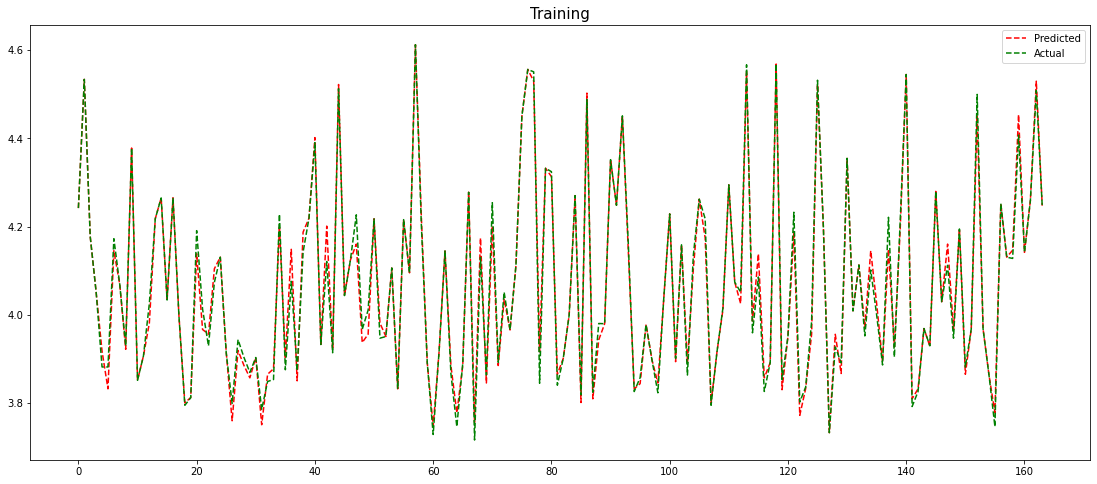

In [419]:
plt.figure(figsize = (19,8))
plt.plot(poly_y_train_pred, color = 'red',linestyle = '--')
plt.plot(np.array(y_train),color = 'green',linestyle = '--')
plt.legend(['Predicted','Actual'])
plt.title('Training',fontsize = 15)
plt.show()

# This is a perfect example of overfit model 
## performs very good on training and fails miserably on the test data 

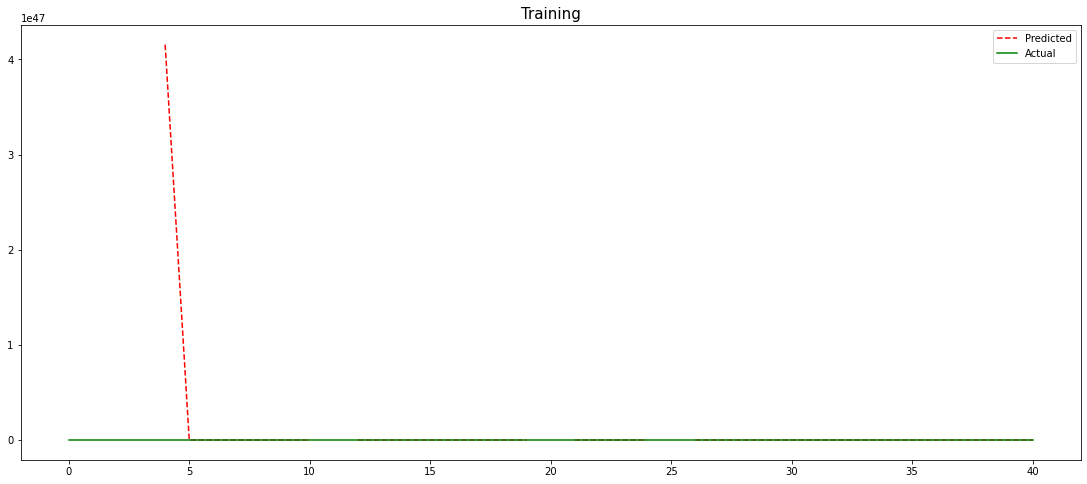

In [457]:
plt.figure(figsize = (19,8))
plt.plot(10**poly_y_test_pred, color = 'red',linestyle = '--')
plt.plot(np.array(10**y_test),color = 'green')
plt.legend(['Predicted','Actual'])
plt.title('Training',fontsize = 15)
plt.show()

## Why are we getting such graphical represenation because the range of the graph is very very high for the predicted vales for test data